# 라이브러리 로드

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

<AxesSubplot:title={'center':'한글'}>

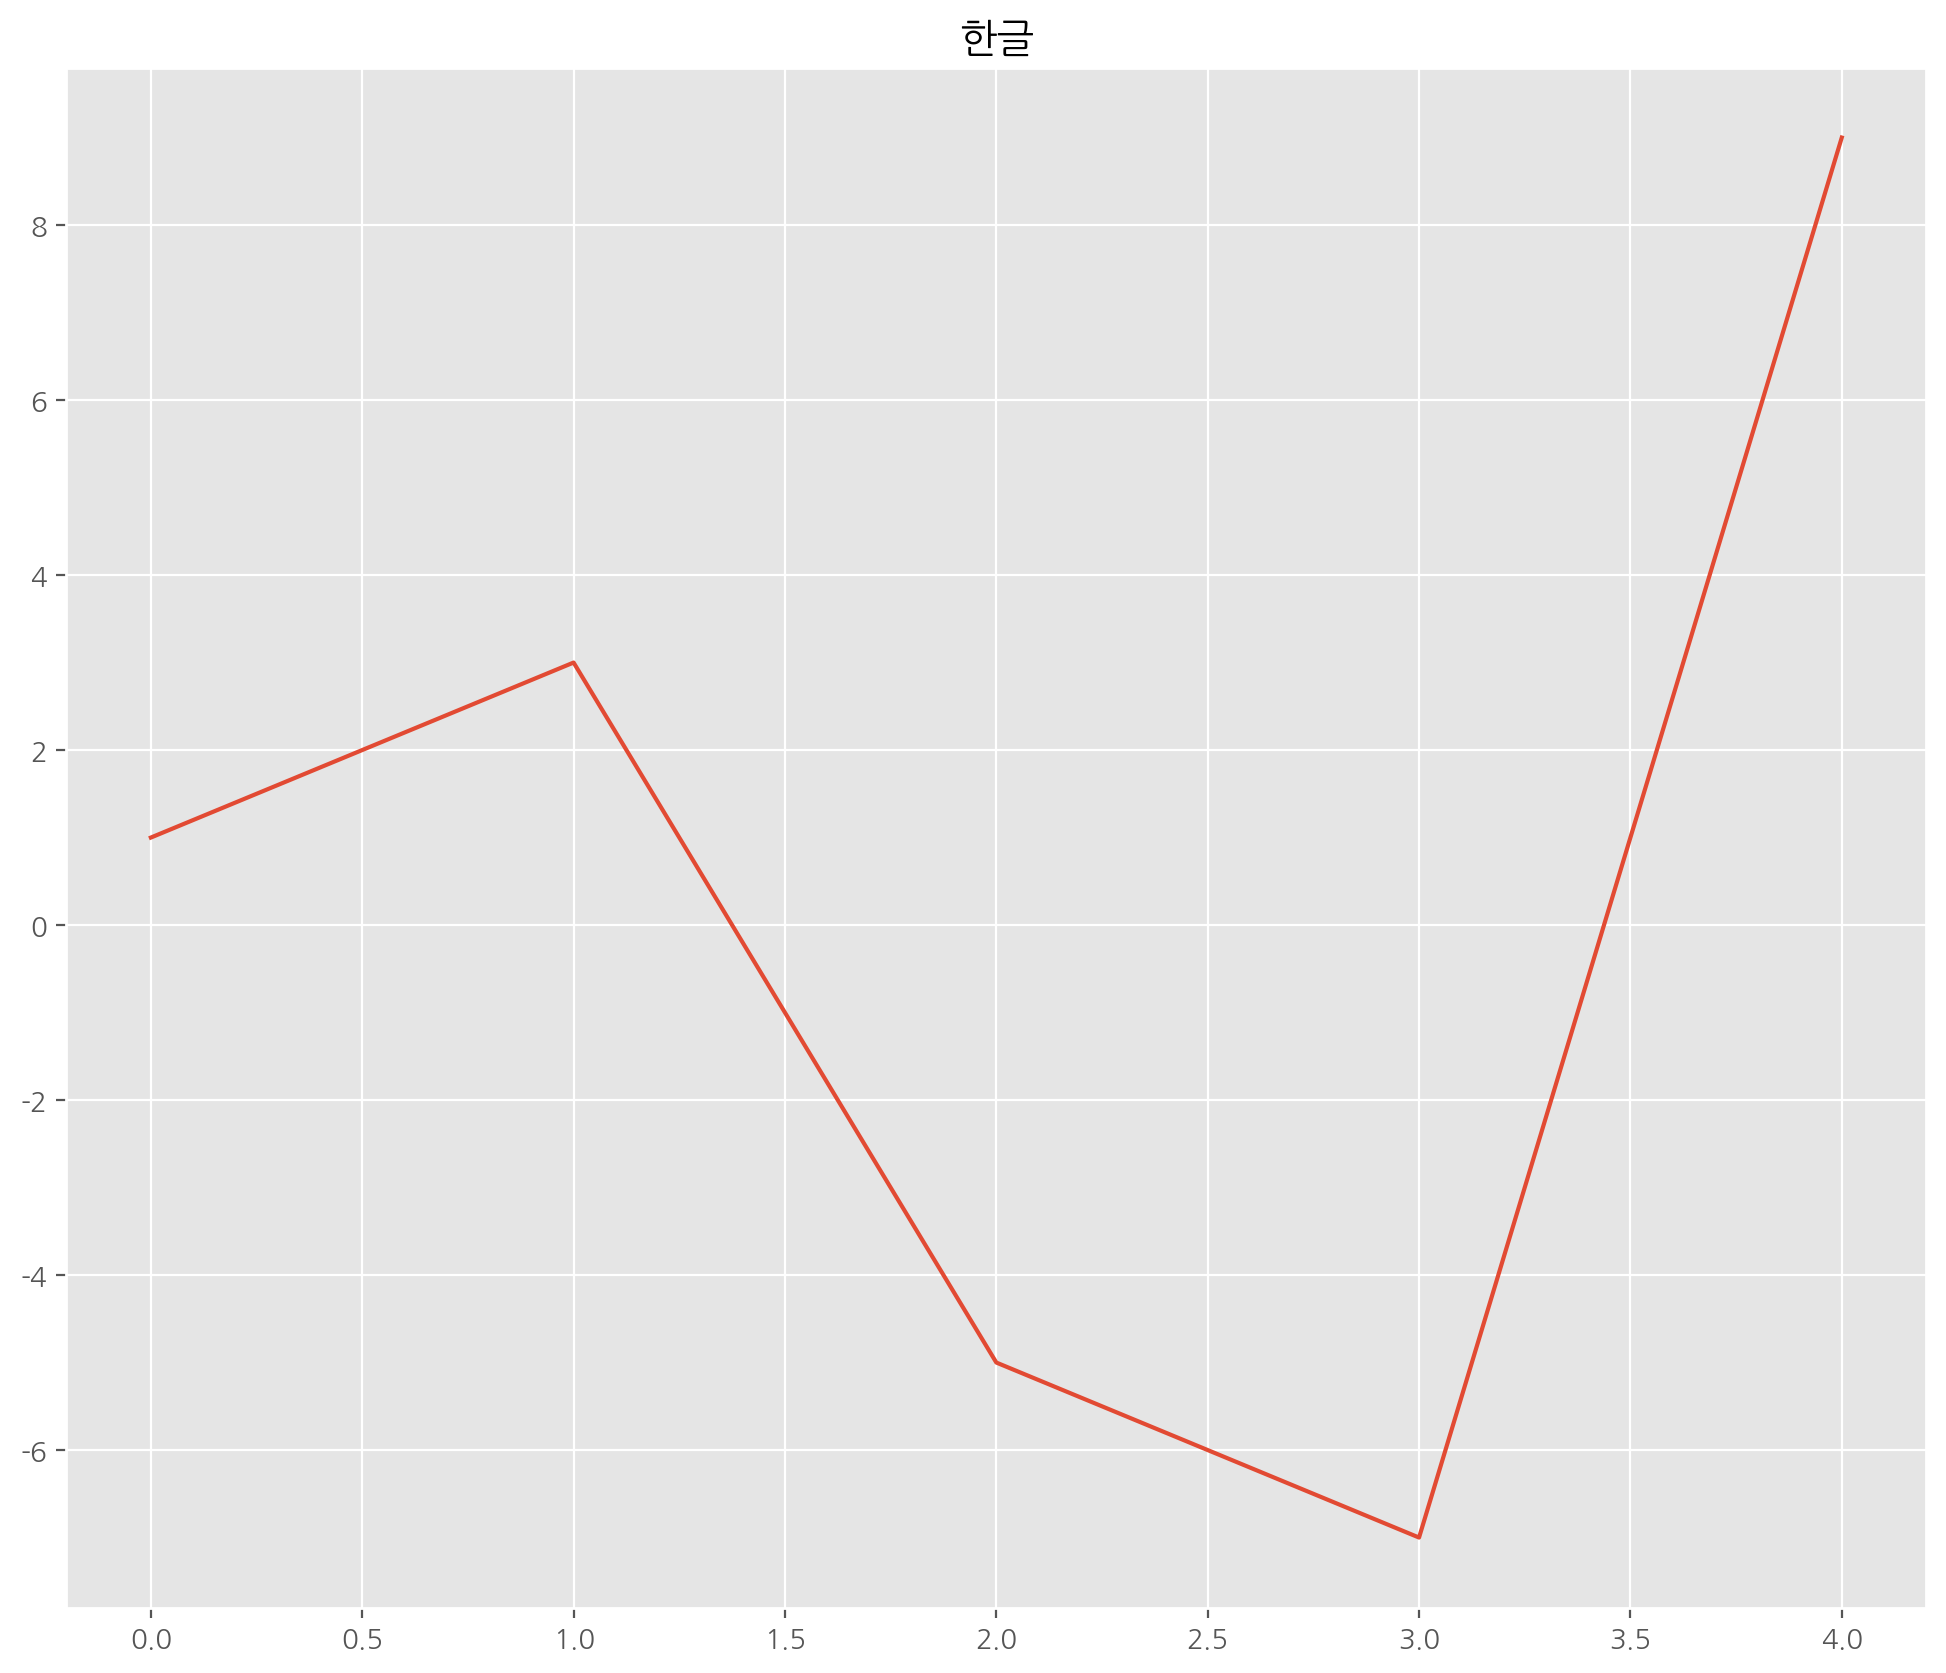

In [74]:
# 한글, 음수가 깨지지 않고 잘 출력되는지 확인
# 스타일을 먼저 불러와야 한글이 깨지지 않음
plt.style.use('ggplot')
pd.Series([1, 3, -5, -7, 9]).plot(title="한글", figsize=(12, 10))

# 데이터 불러오기

In [75]:
# 파일 경로 출력
from glob import glob

file_path = glob("apt*.csv")
file_path

['apt주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv',
 'apt전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv']

In [76]:
# 최근 데이터 파일 불러오기
df_last = pd.read_csv(file_path[0], encoding="cp949")
df_last.shape

(6120, 5)

In [77]:
# 과거 데이터 파일 불러오기
df_first = pd.read_csv(file_path[1], encoding="cp949")
df_first.shape

(17, 22)

## 두 데이터의 형식이 완전 다른 것을 알 수 있음

In [78]:
df_last.head(2)

,지역명,규모구분,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652


In [79]:
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


# 데이터를 합치기 위해 최신 데이터 전처리

## 결측지 조회

In [80]:
# 결측치 개수 조회
df_last.isnull().sum()

지역명       0
규모구분      0
연도        0
월         0
분양가격    479
dtype: int64

In [81]:
# 결측치 비율 조회
df_last.isnull().mean()

지역명     0.000000
규모구분    0.000000
연도      0.000000
월       0.000000
분양가격    0.078268
dtype: float64

<AxesSubplot:>

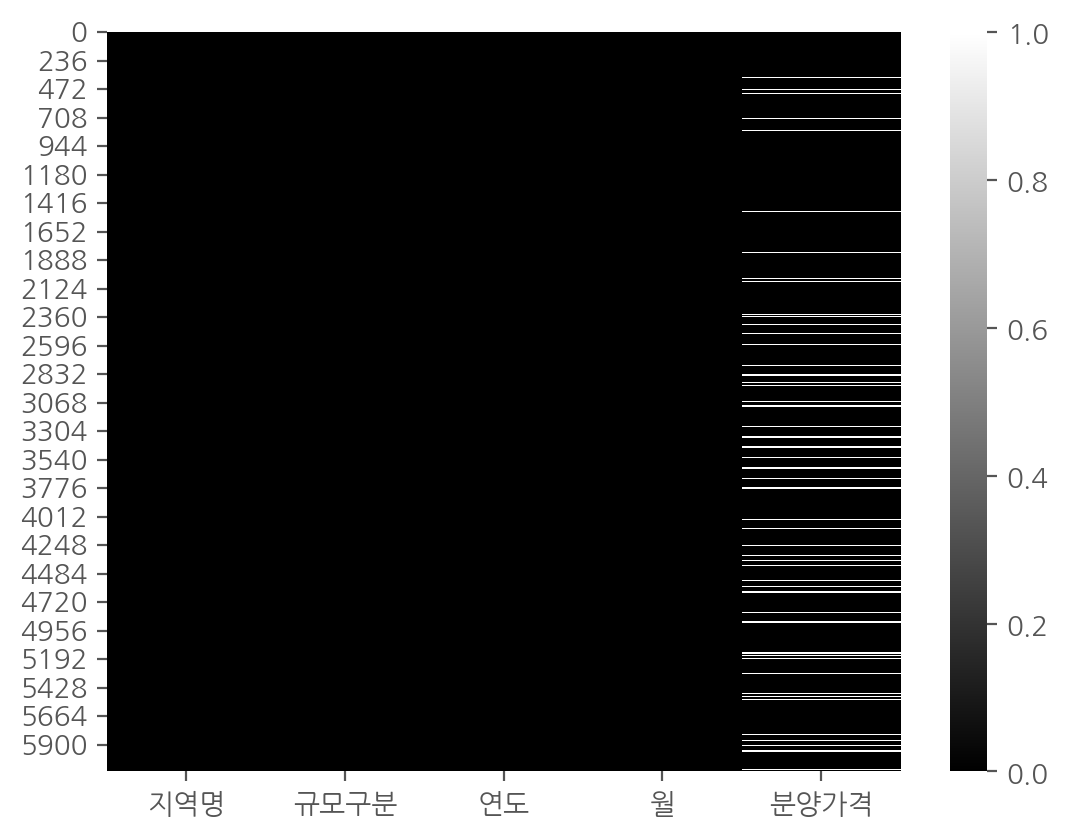

In [82]:
# 결측치 시각화
sns.heatmap(df_last.isnull(), cmap="gray")

## 데이터 타입 변경, 파생변수 생성
* `pd.to_numeric(df)`
* `errors='coerce'` : 결측치와 같은 에러가 났을 때 NaN으로 변경
* `df.astype(int)`은 결측치 처리에서 문제 발생

In [83]:
# 숫자를 제외한 모든 문자를 빈문자로 변경하는 정규표현
# df_last["분양가격"] = df_last["분양가격"].str.replace("[^0-9]", "", regex=True)

In [84]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격"], errors='coerce')

In [85]:
# 파생변수 : 평당분양가격
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

In [86]:
df_last.head(3)

,지역명,규모구분,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6


In [87]:
# Dtype이 잘 변경된 것을 볼 수 있음
df_last["평당분양가격"].describe()

count     5625.000000
mean     11415.748960
std       4658.860978
min       6164.400000
25%       8494.200000
50%      10121.100000
75%      12942.600000
max      45655.500000
Name: 평당분양가격, dtype: float64

## unique 값 출력 

In [88]:
df_last

,지역명,규모구분,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
6115,제주,모든면적,2021,9,8356.0,27574.8
6116,제주,전용면적 60제곱미터이하,2021,9,NaN,NaN
6117,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,9,8410.0,27753.0
6118,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,9,NaN,NaN


In [89]:
# regex=True : 결과는 같고 경고메시지 출력 여부만 달라진다. 현재는 기본값이 True지만 미래버전에서 False로 될 예정
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터이하", "", regex=True)
df_last["전용면적"] = df_last["전용면적"].str.replace("제곱미터초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "")
df_last["전용면적"]

0         모든면적
1           60
2        60~85
3       85~102
4         102~
         ...  
6115      모든면적
6116        60
6117     60~85
6118    85~102
6119      102~
Name: 전용면적, Length: 6120, dtype: object

In [90]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터이하", "")

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_60814/1323221951.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터이하", "")


## 필요없는 컬럼 제거

In [91]:
# 메모리 334kb 확인할 수 있음
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
 6   전용면적    6120 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 334.8+ KB


In [92]:
# 삭제할 수 있는 두 가지 코드
# df_last = df_last.drop(labels=["규모구분", "분양가격"], axis=1)
df_last = df_last.drop(columns=["규모구분", "분양가격"])

In [93]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60
2,서울,2015,10,19410.6,60제곱미터초과 85
3,서울,2015,10,18879.3,85제곱미터초과 102
4,서울,2015,10,19400.7,102제곱미터초과
...,...,...,...,...,...
6115,제주,2021,9,27574.8,모든면적
6116,제주,2021,9,NaN,60
6117,제주,2021,9,27753.0,60제곱미터초과 85
6118,제주,2021,9,NaN,85제곱미터초과 102


In [94]:
# 메모리가 줄어든 것을 볼 수 있음
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   연도      6120 non-null   int64  
 2   월       6120 non-null   int64  
 3   평당분양가격  5625 non-null   float64
 4   전용면적    6120 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 239.2+ KB


## 시각화 

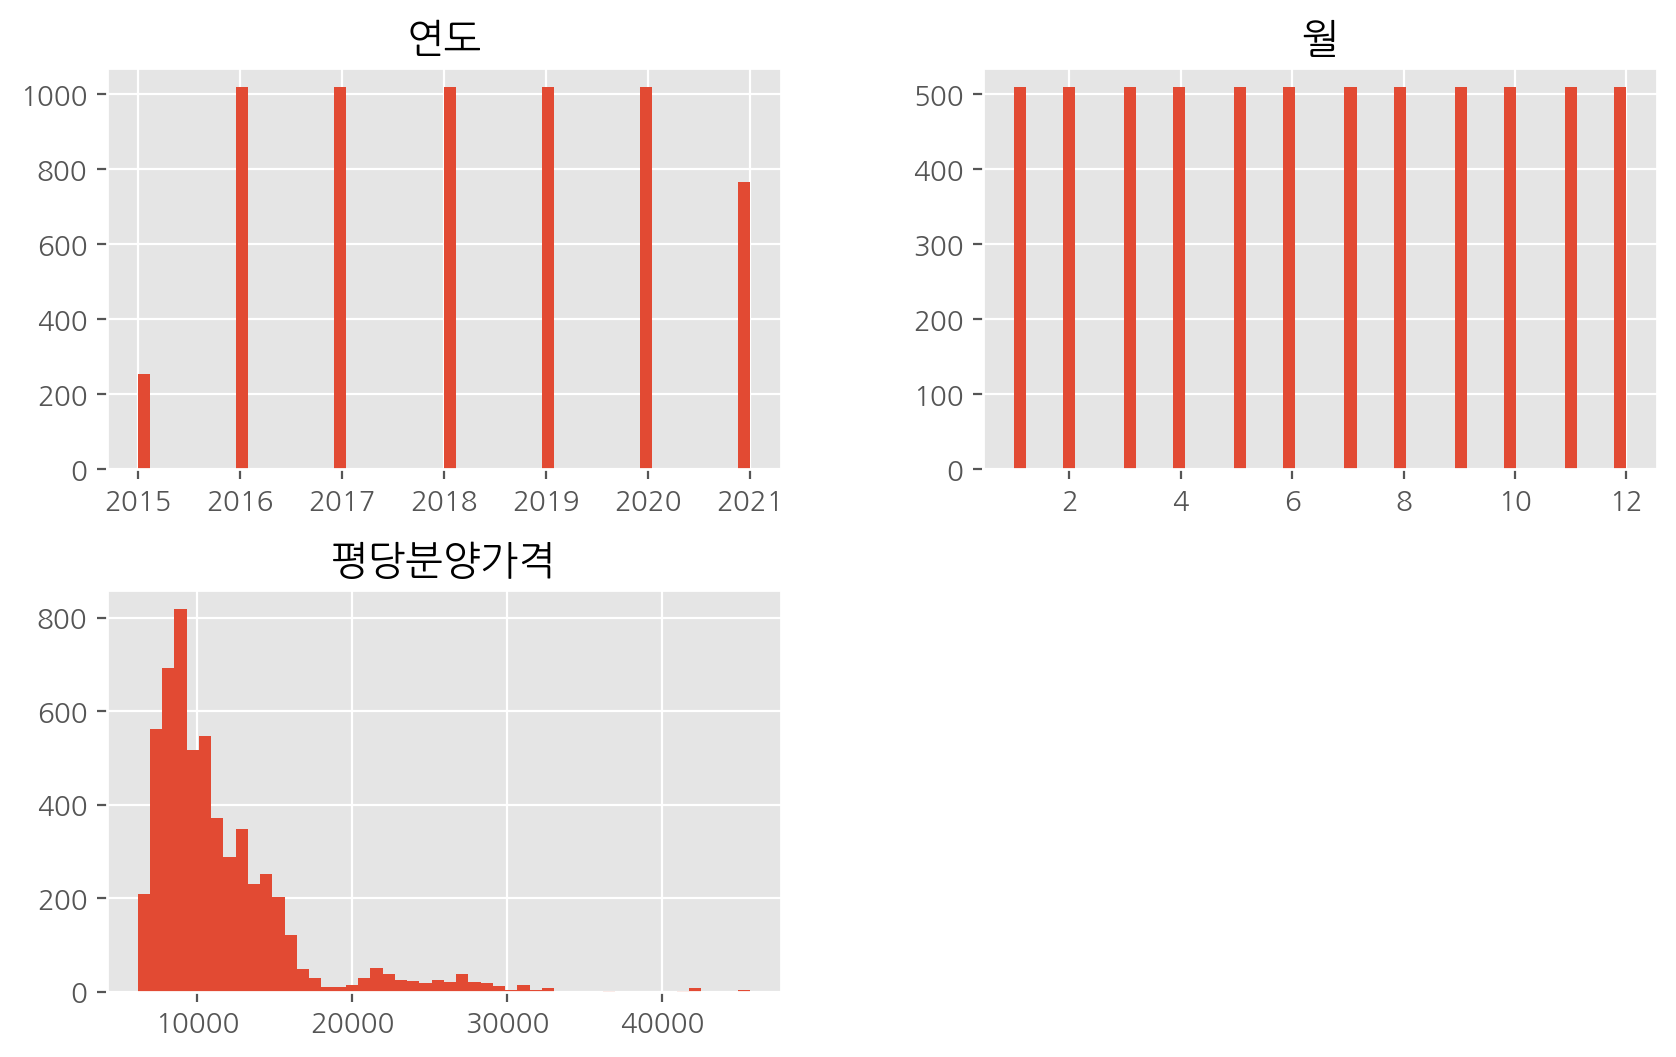

In [95]:
df_last.hist(figsize=(10, 6), bins=50);

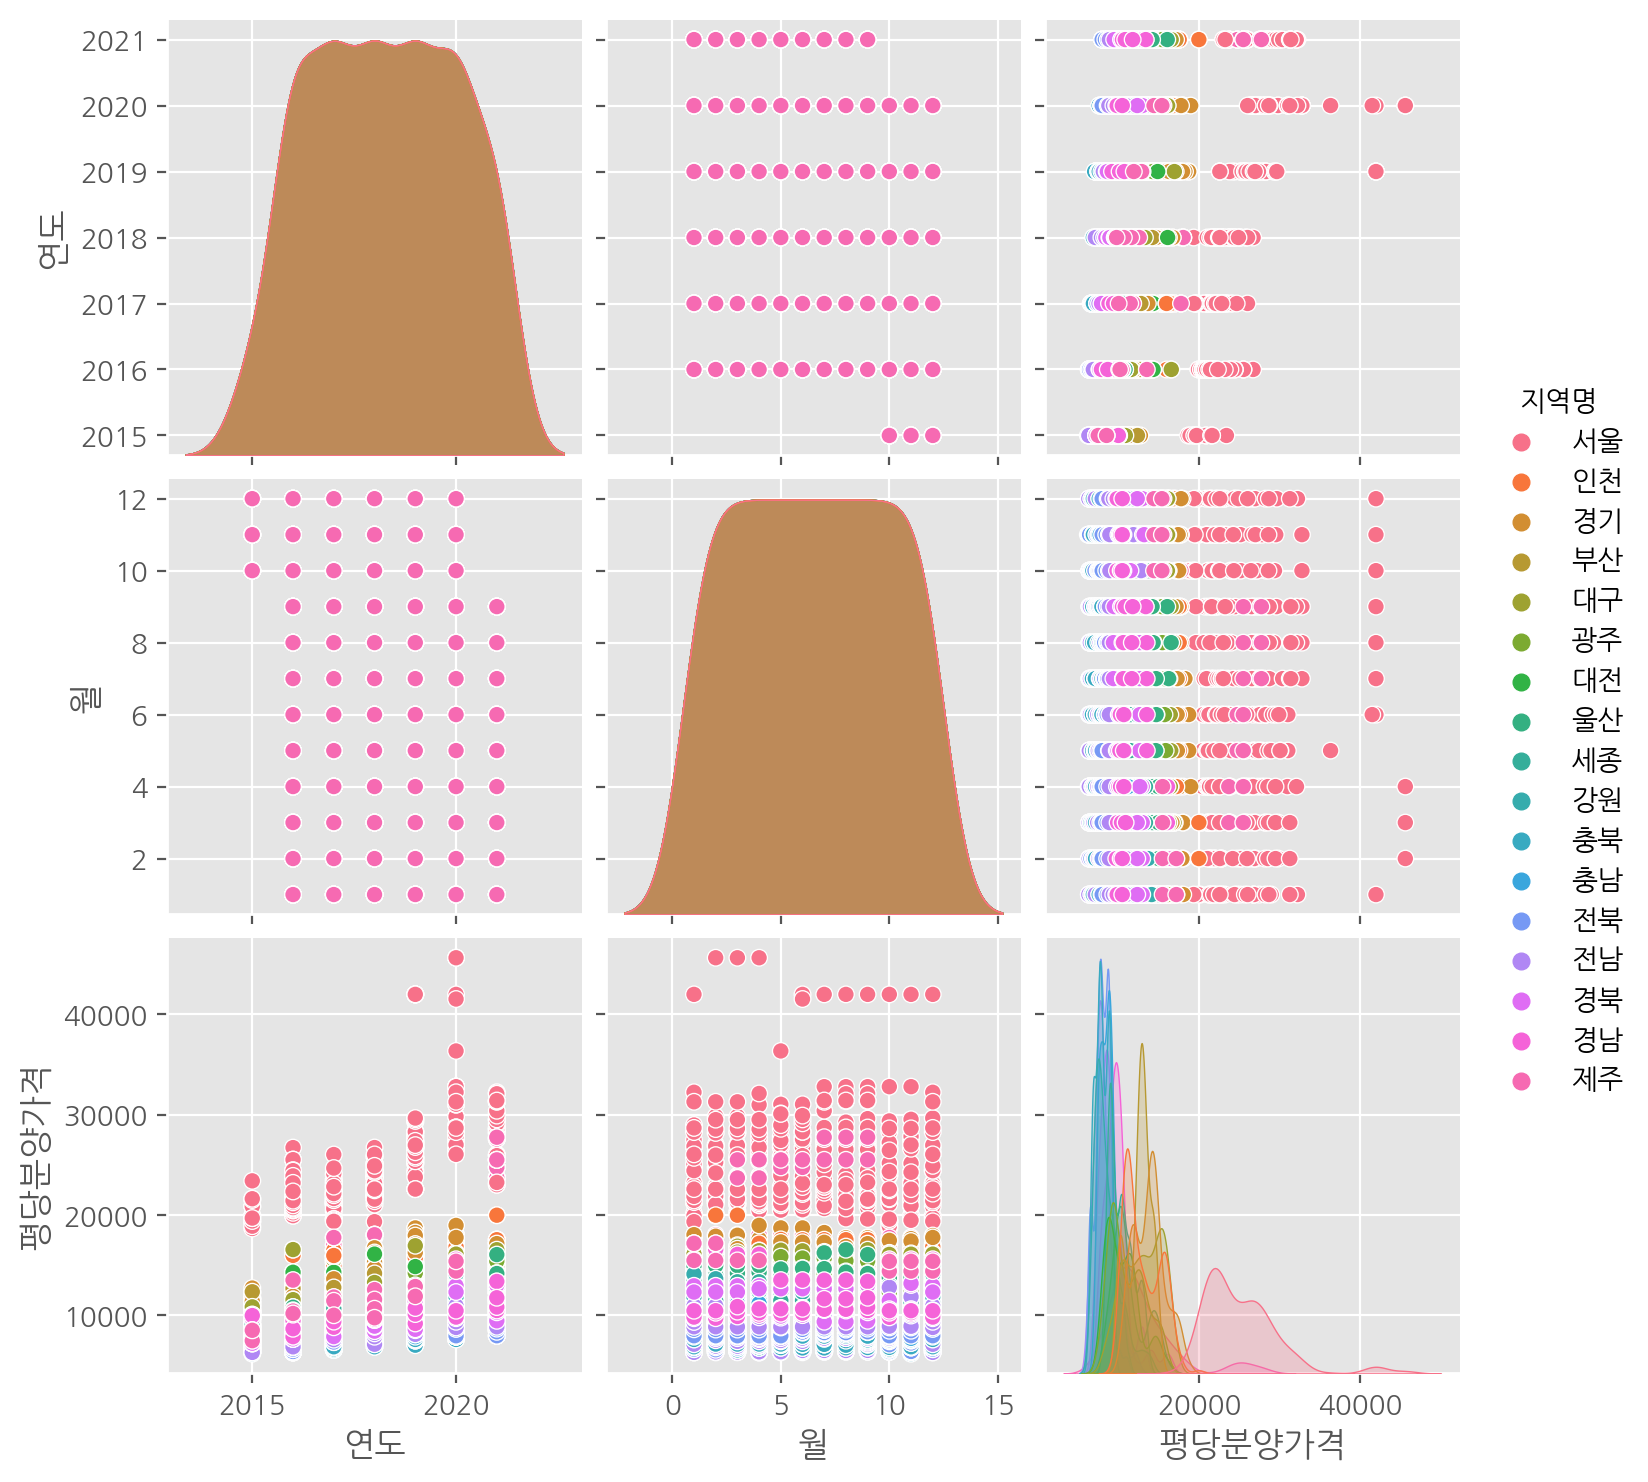

In [96]:
sns.pairplot(df_last, hue="지역명")

# 과거 데이터 전처리

In [97]:
# 출력되는 컬럼 개수 설정
# 모든 컬럼은 = None
pd.options.display.max_columns = None

In [98]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [99]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [100]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

## melt로 tidy data 만들기

In [101]:
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [102]:
# id_vars="지역" :  지역 column만 남기고 다 녹이겠다는 의미
# value_vars="지역" : 지역 column을 녹이겠다는 의미
df_first_melt = pd.melt(df_first, id_vars="지역")
df_first_melt

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [103]:
# df_first_melt = pd.melt(df_first, id_vars="지역", 
#                        var_name="변수 컬럼 이름", value_name="값 컬럼 이름")
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(2)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


## 연도와 월 분리

In [113]:
df_first_melt

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [121]:
df_first_melt["연도"] = df_first_melt["기간"].str.split("년").map(lambda x: int(x[0]))
df_first_melt["월"] = df_first_melt["기간"].str.split("년").map(lambda x: int(x[1][:-1]))

In [122]:
df_first_melt

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [ ]:
# 조은님의 날짜 분리 함수 버전
def parse_year(date):
    return int(date.split("년")[0])

def parse_month(date):
    return int(date.split("년")[1][:-1])

In [123]:
# expand=True : split 결과물을 df로 반환
df_first_melt["기간"].str.split("년", expand=True)

,0,1
0,2013,12월
1,2013,12월
2,2013,12월
3,2013,12월
4,2013,12월
...,...,...
352,2015,8월
353,2015,8월
354,2015,8월
355,2015,8월


In [ ]:
# df_first_melt["기간"].str.split("년", expand=True)[1].str[:-1].astype(int)

# concat으로 합치기 

In [124]:
# 사용할 컬럼
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [133]:
df_last_prepare = df_last.loc[df_last["전용면적"] == "모든면적", cols]
df_last_prepare.head(2)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9


In [135]:
df_first_prepare = df_first_melt[cols]
df_first_prepare.head(2)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111


In [242]:
df = pd.concat([df_first_prepare, df_last_prepare])
df = df.reset_index(drop=True)

In [243]:
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [244]:
df.tail()

,지역명,연도,월,평당분양가격
1576,전북,2021,9,8715.3
1577,전남,2021,9,10487.4
1578,경북,2021,9,10345.5
1579,경남,2021,9,10873.5
1580,제주,2021,9,27574.8


In [245]:
df["연도"].value_counts().sort_index()

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
2020    204
2021    153
Name: 연도, dtype: int64

# groupby 

<AxesSubplot:xlabel='지역명'>

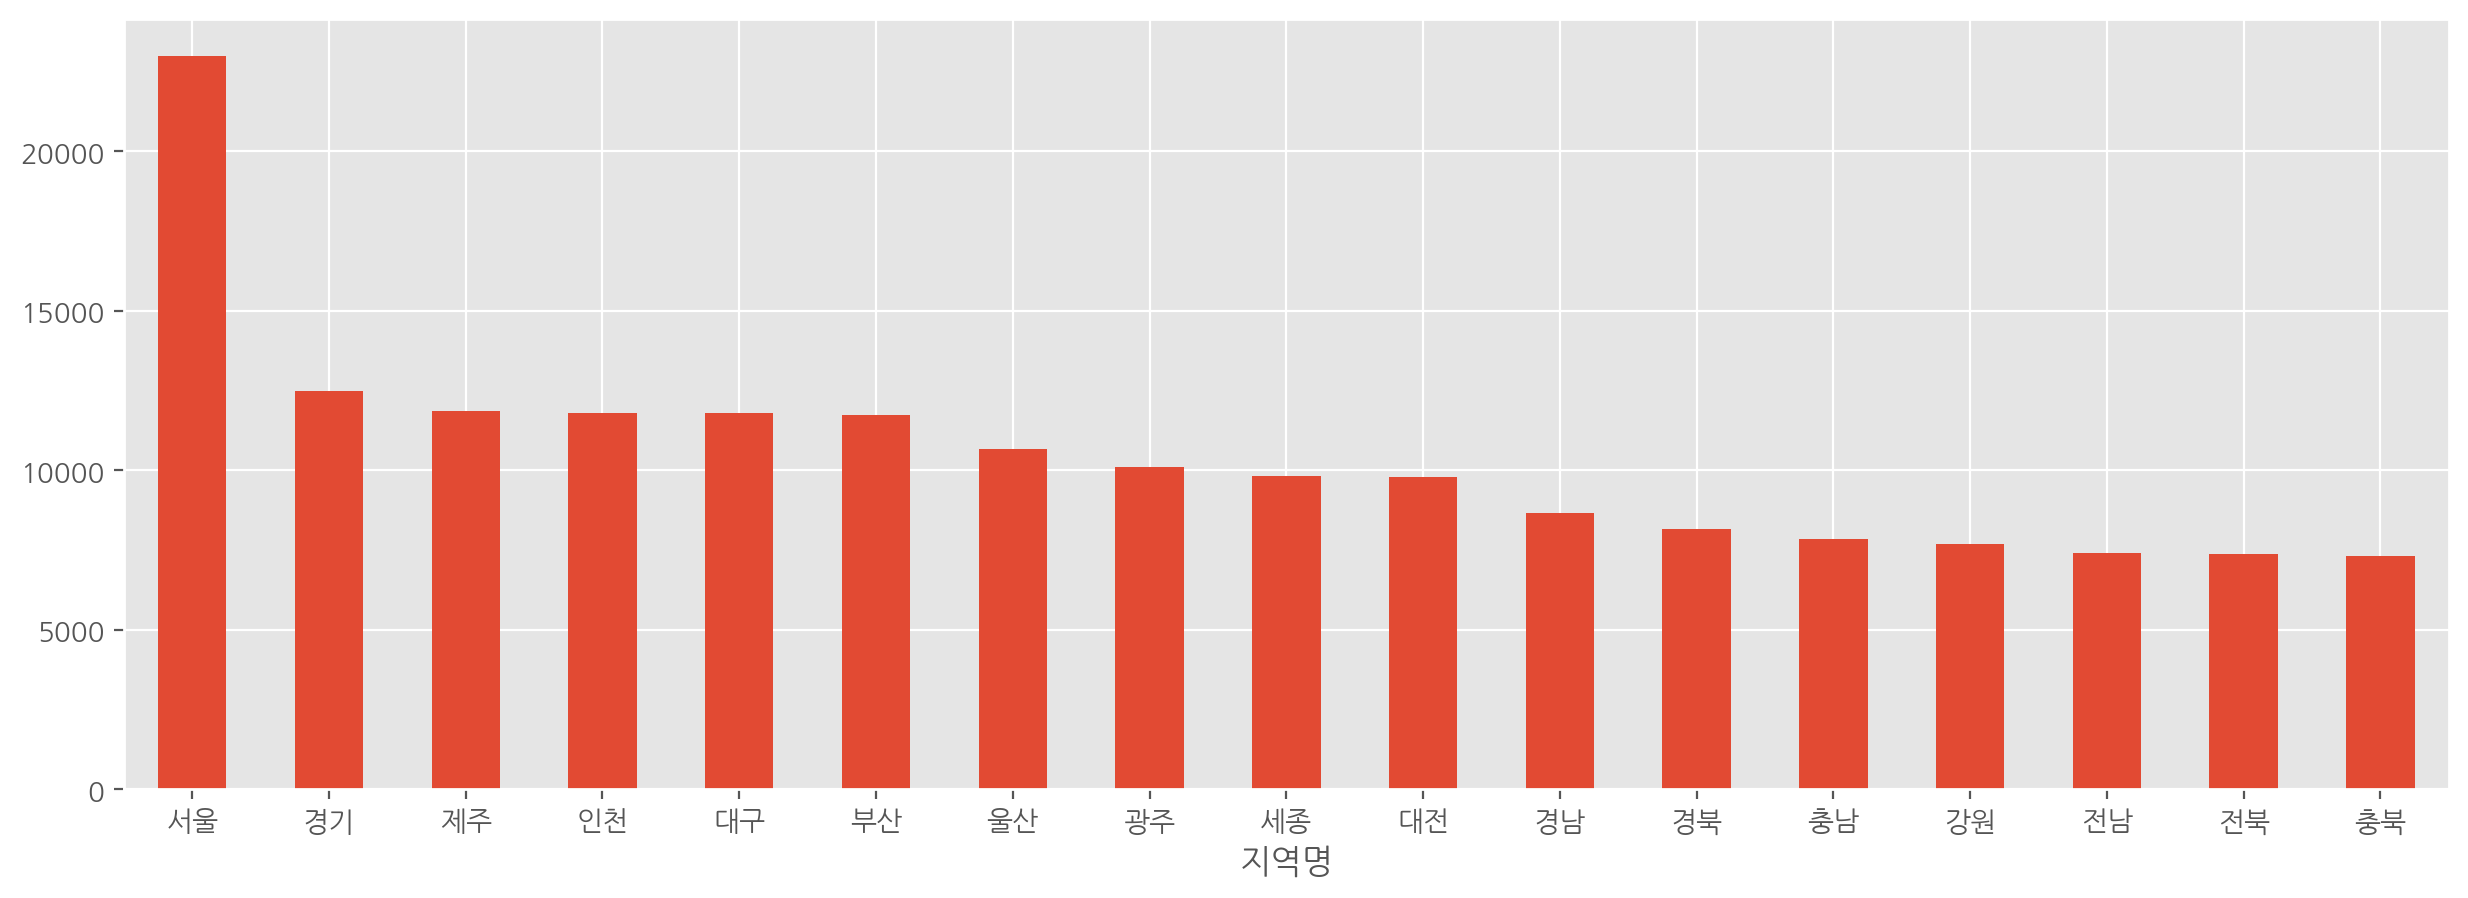

In [246]:
# 지역별 평당분양가격 평균 시각화
df.groupby("지역명")["평당분양가격"].mean().sort_values(ascending=False).plot(kind='bar', rot=0, figsize=(15, 5))

In [247]:
# 연도, 지역별 평당분양가격의 평균
df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.000000,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.250000,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.600000,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.500000,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7170.625000,11840.675000,8163.925000,7802.575000,9471.000000,11507.100000,9056.025000,11663.575000,21425.250000,9133.025000,11327.525000,10749.475000,7245.700000,7074.650000,10907.325000,7455.800000,6770.225000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.350000,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.050000,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000
2020,9331.300000,14383.325000,10160.700000,9544.975000,12500.125000,15145.075000,11094.050000,13247.575000,26910.125000,11355.300000,12202.850000,14674.000000,8696.875000,8317.100000,14540.900000,8856.100000,7959.600000
2021,9651.766667,14093.933333,10386.566667,10261.533333,13937.733333,15487.266667,11761.200000,14352.066667,29301.433333,12540.000000,14272.500000,15103.733333,9966.366667,8784.600000,23790.800000,9264.566667,8634.633333


# pivot table

In [248]:
# pivot table 을 이용하여 지역별 평당분양가격
df.pivot_table(index="지역명", values="평당분양가격")
pd.pivot_table(data=df, index="지역명", values="평당분양가격")

,평당분양가격
지역명,
강원,7701.655914
경기,12477.155914
경남,8661.929032
경북,8163.291398
광주,10114.936559
대구,11799.490323
대전,9779.794624
부산,11729.804301
서울,22991.492473


<AxesSubplot:xlabel='지역명'>

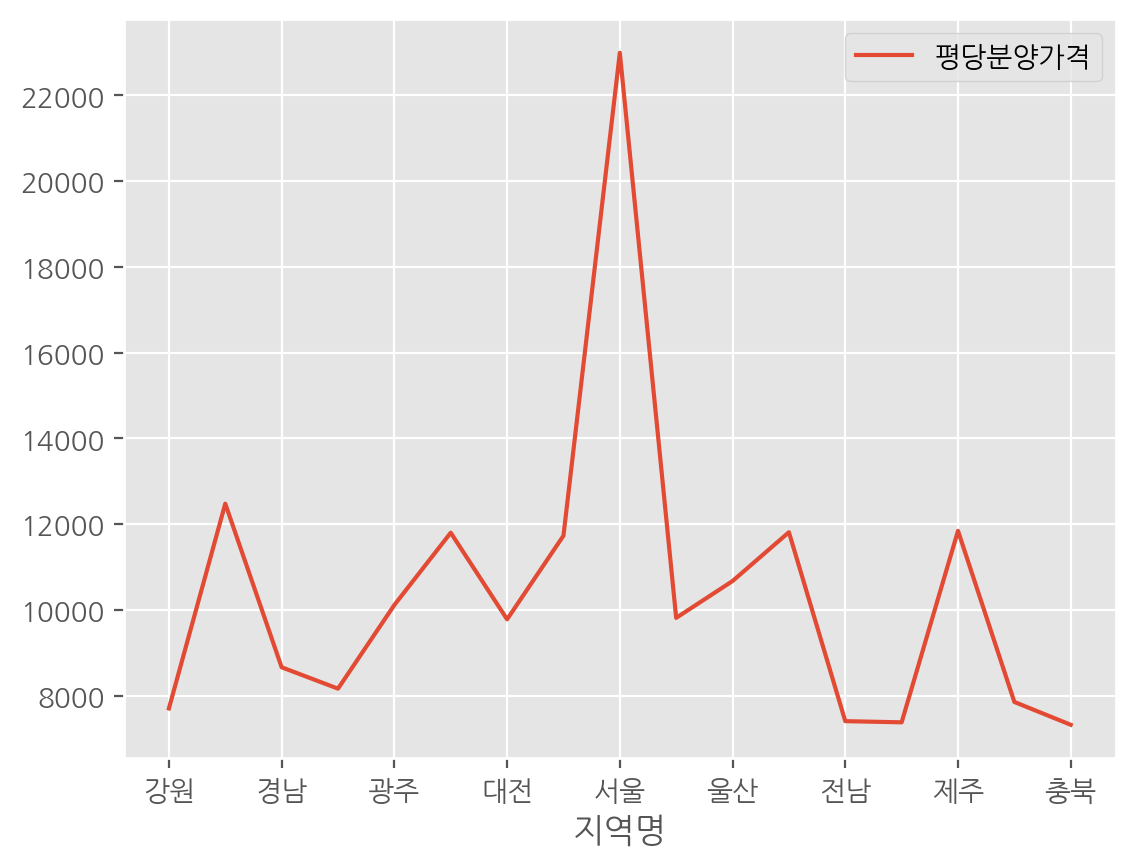

In [249]:
# pivot table 시각화
df.pivot_table(index="지역명", values="평당분양가격").plot()

In [250]:
# 연도, 지역 별 평당분양가격의 평균
y_r_pt = df.pivot_table(index="연도", columns="지역명", values="평당분양가격")
y_r_pt

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.000000,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.250000,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.600000,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.500000,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7170.625000,11840.675000,8163.925000,7802.575000,9471.000000,11507.100000,9056.025000,11663.575000,21425.250000,9133.025000,11327.525000,10749.475000,7245.700000,7074.650000,10907.325000,7455.800000,6770.225000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.350000,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.050000,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000
2020,9331.300000,14383.325000,10160.700000,9544.975000,12500.125000,15145.075000,11094.050000,13247.575000,26910.125000,11355.300000,12202.850000,14674.000000,8696.875000,8317.100000,14540.900000,8856.100000,7959.600000
2021,9651.766667,14093.933333,10386.566667,10261.533333,13937.733333,15487.266667,11761.200000,14352.066667,29301.433333,12540.000000,14272.500000,15103.733333,9966.366667,8784.600000,23790.800000,9264.566667,8634.633333


In [251]:
# 그래프 스타일 종류
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

<AxesSubplot:xlabel='지역명', ylabel='연도'>

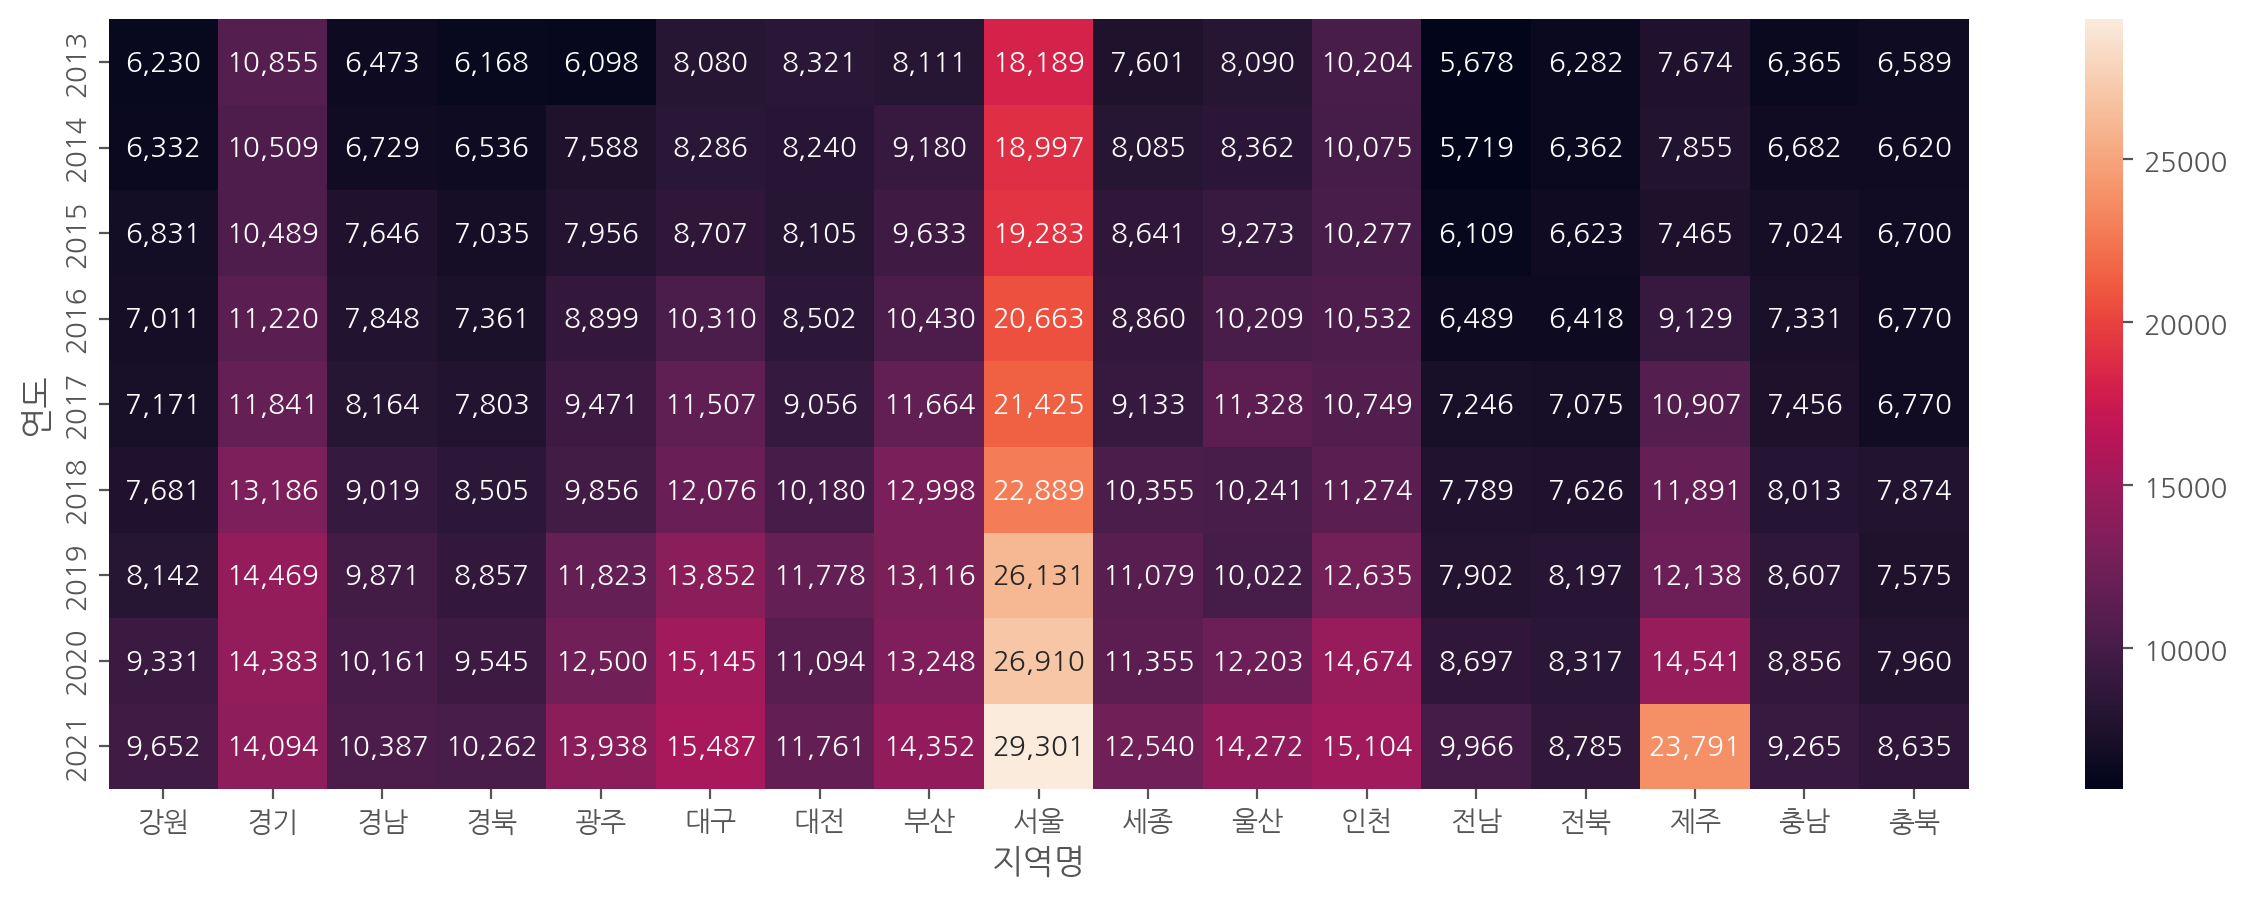

In [252]:
# annot=True : 히트맵위에 수치 함께 표현
# fmt="g" : 수치 형식
# cmap="" : 그래프 스타일
plt.figure(figsize=(15, 5))
sns.heatmap(y_r_pt, annot=True, fmt=",.0f")

<AxesSubplot:xlabel='연도', ylabel='지역명'>

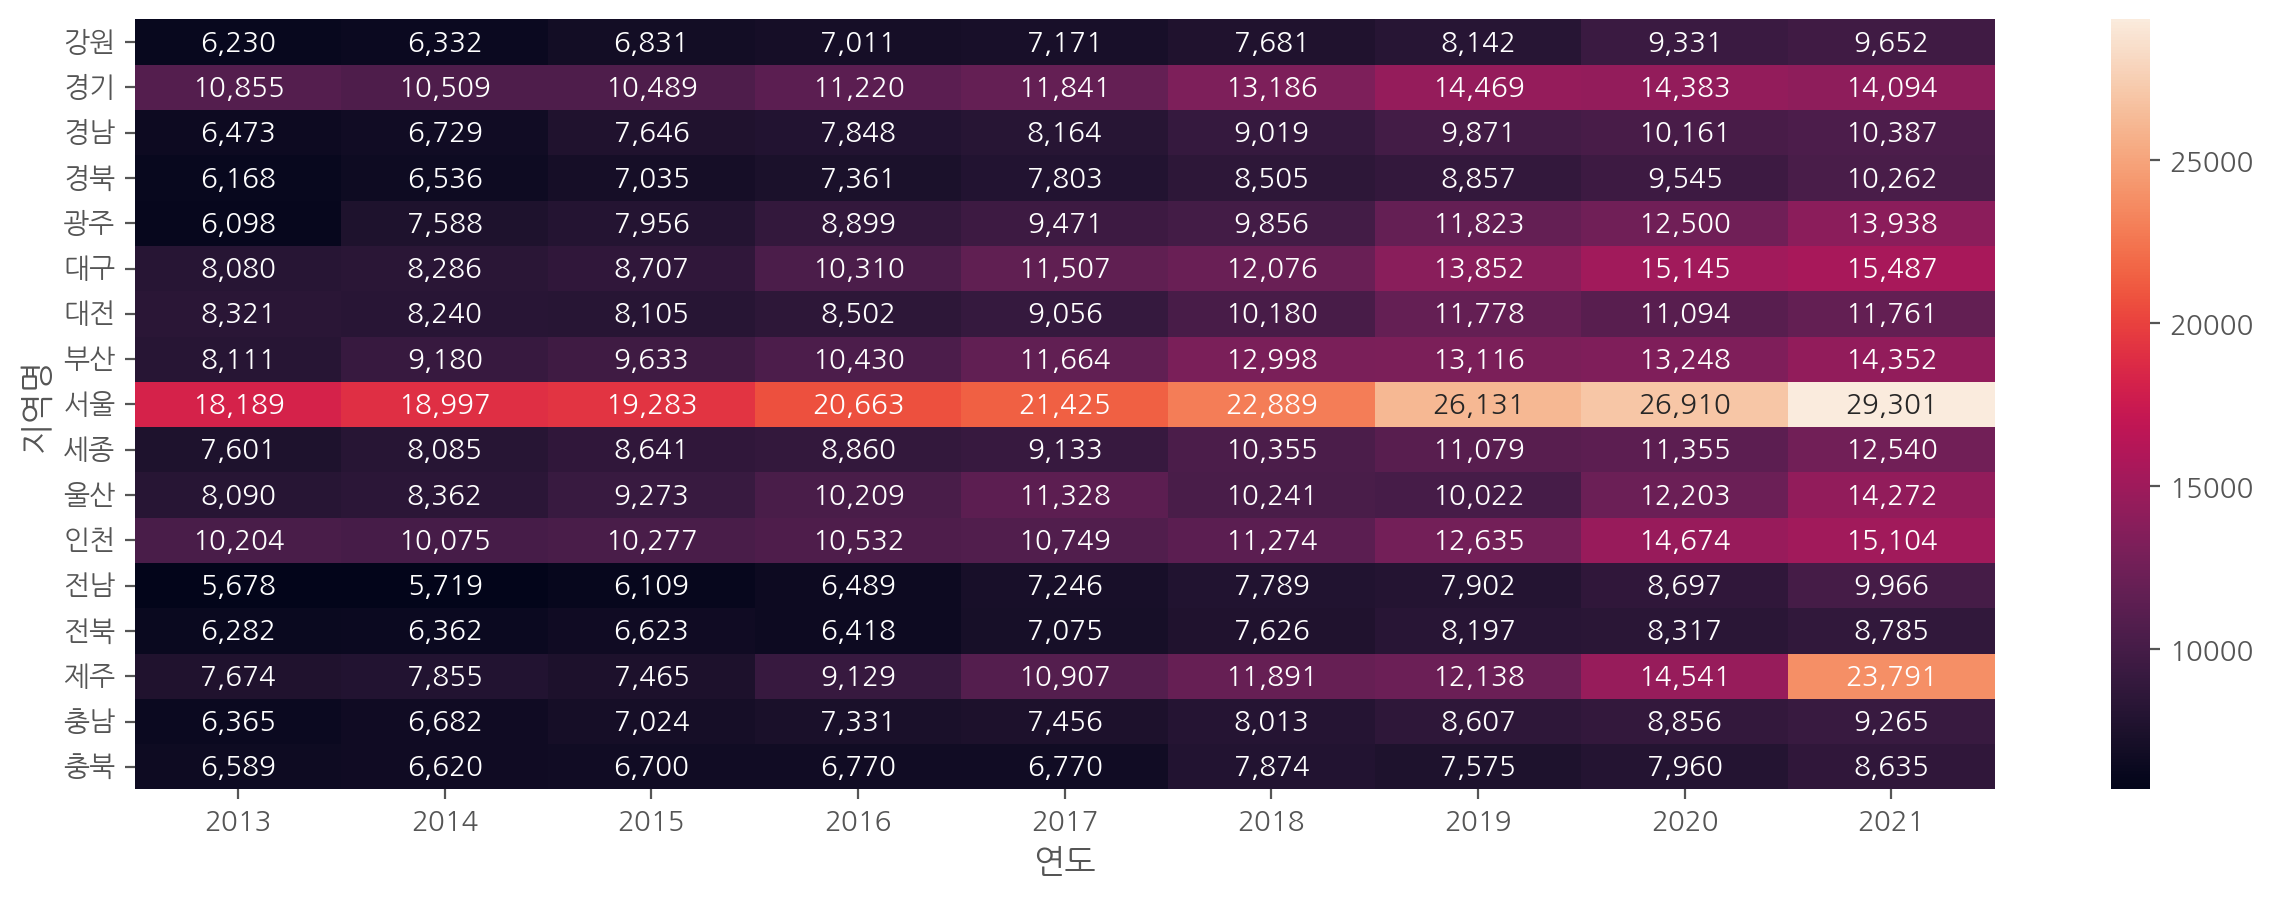

In [253]:
plt.figure(figsize=(15, 5))
sns.heatmap(y_r_pt.T, annot=True, fmt=",.0f")

# 데이터 시각화 

## 연도별 평당분양가격 

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

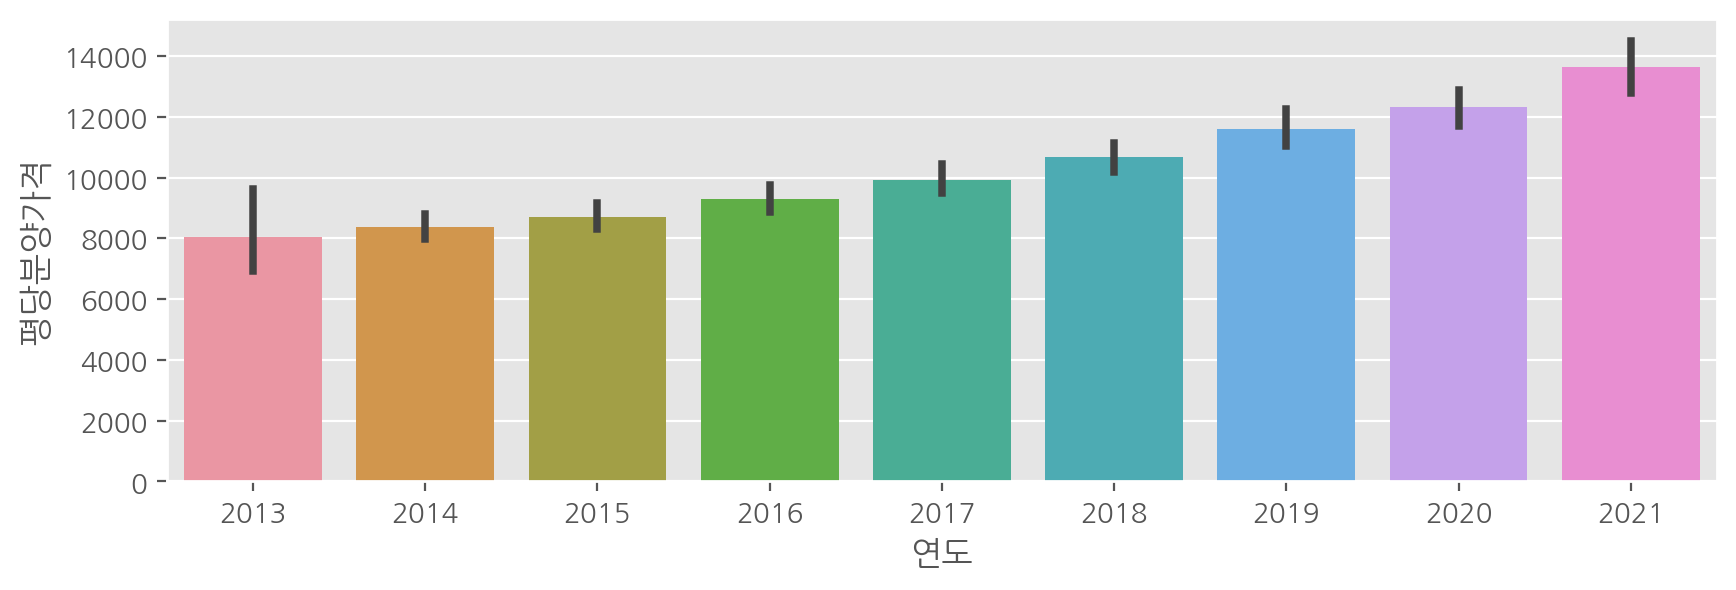

In [254]:
# barplot
plt.figure(figsize=(10, 3))
sns.barplot(df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

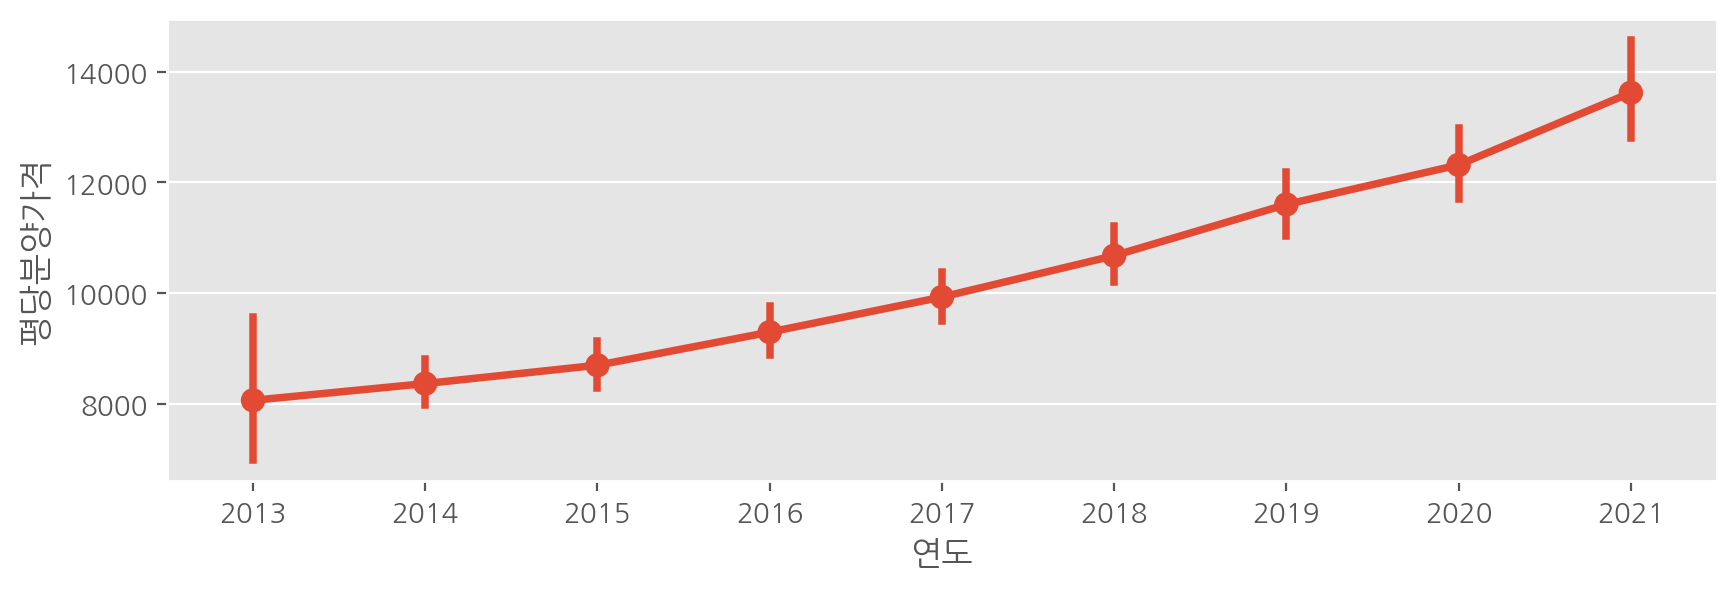

In [255]:
# pointplot
plt.figure(figsize=(10, 3))
sns.pointplot(df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

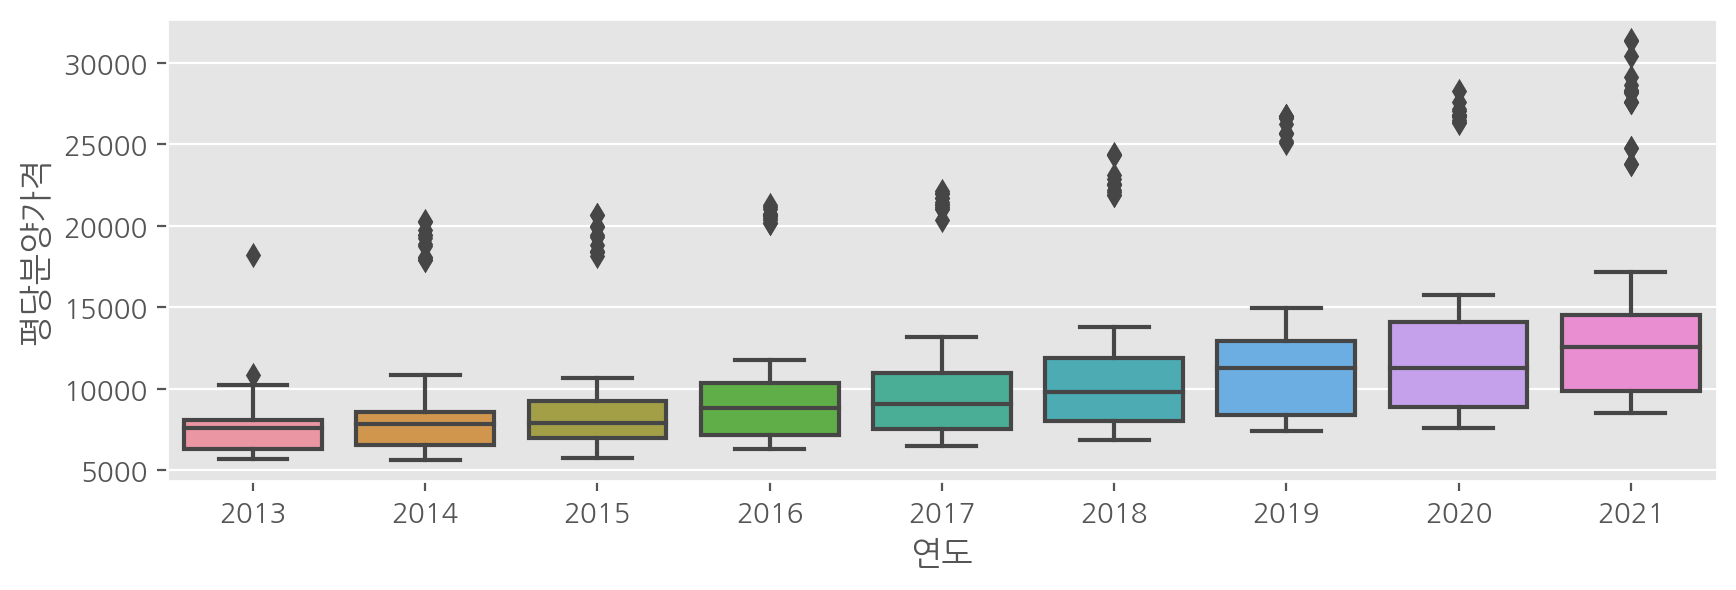

In [256]:
# boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

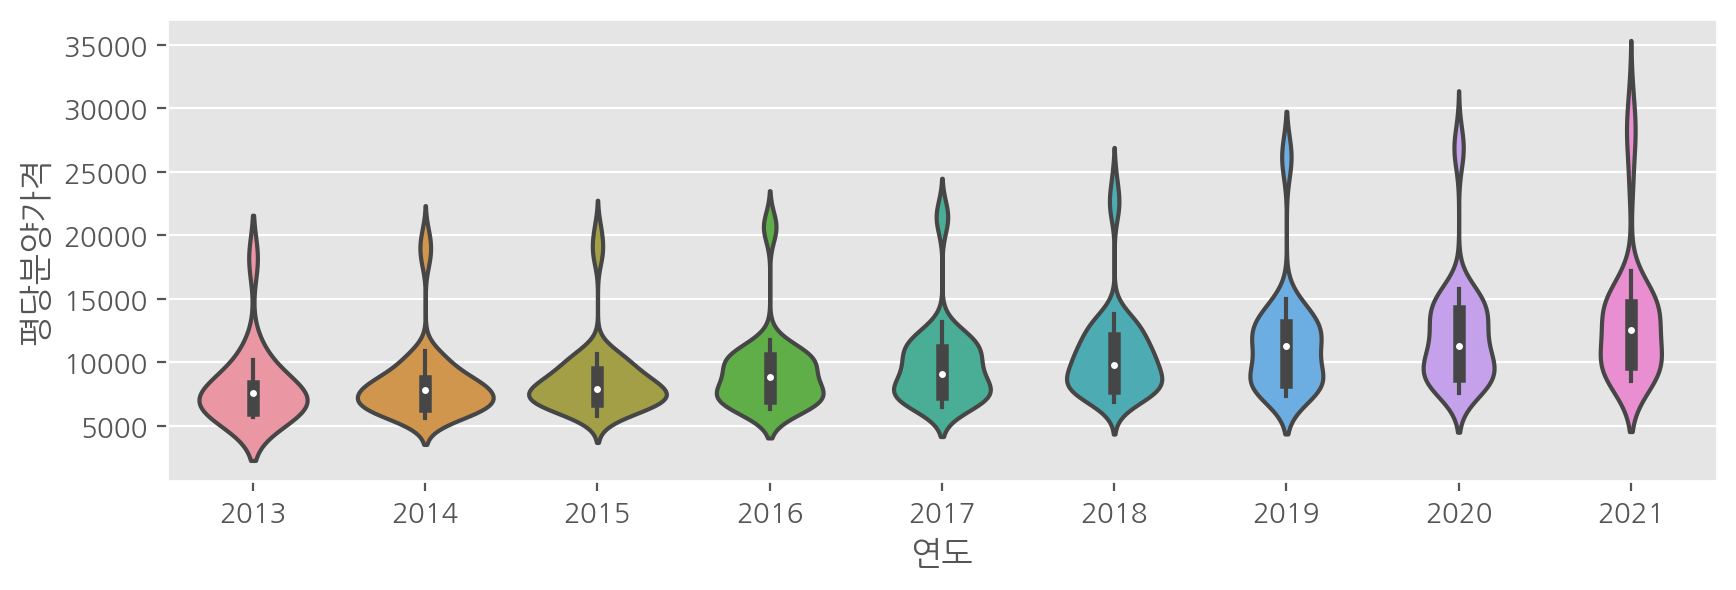

In [257]:
# violinplot
# 가운데 흰 점은 중앙값
plt.figure(figsize=(10, 3))
sns.violinplot(df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

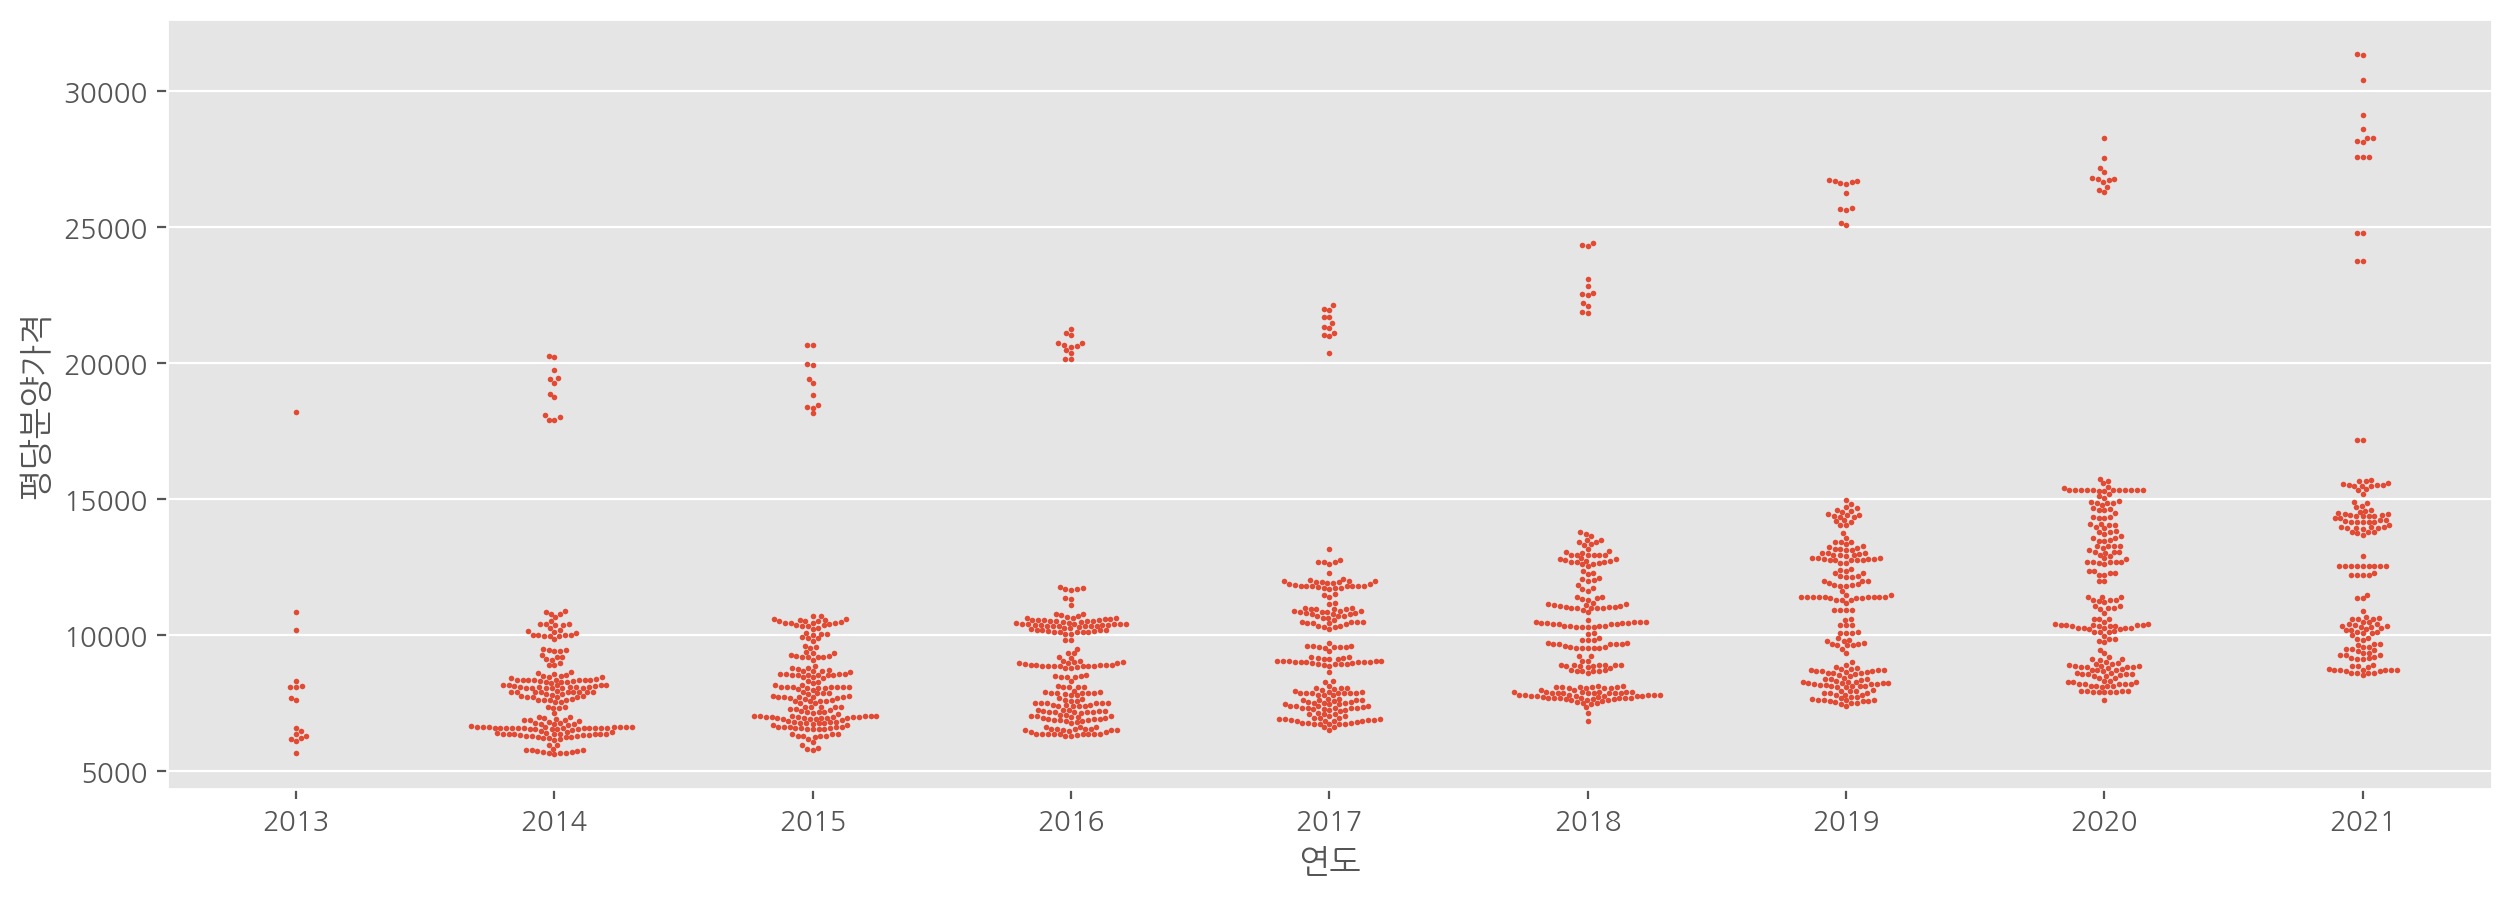

In [258]:
# swarmplot
plt.figure(figsize=(15, 5))
sns.swarmplot(data=df, x="연도", y="평당분양가격", size=2)

## 지역별 평당분양가격

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

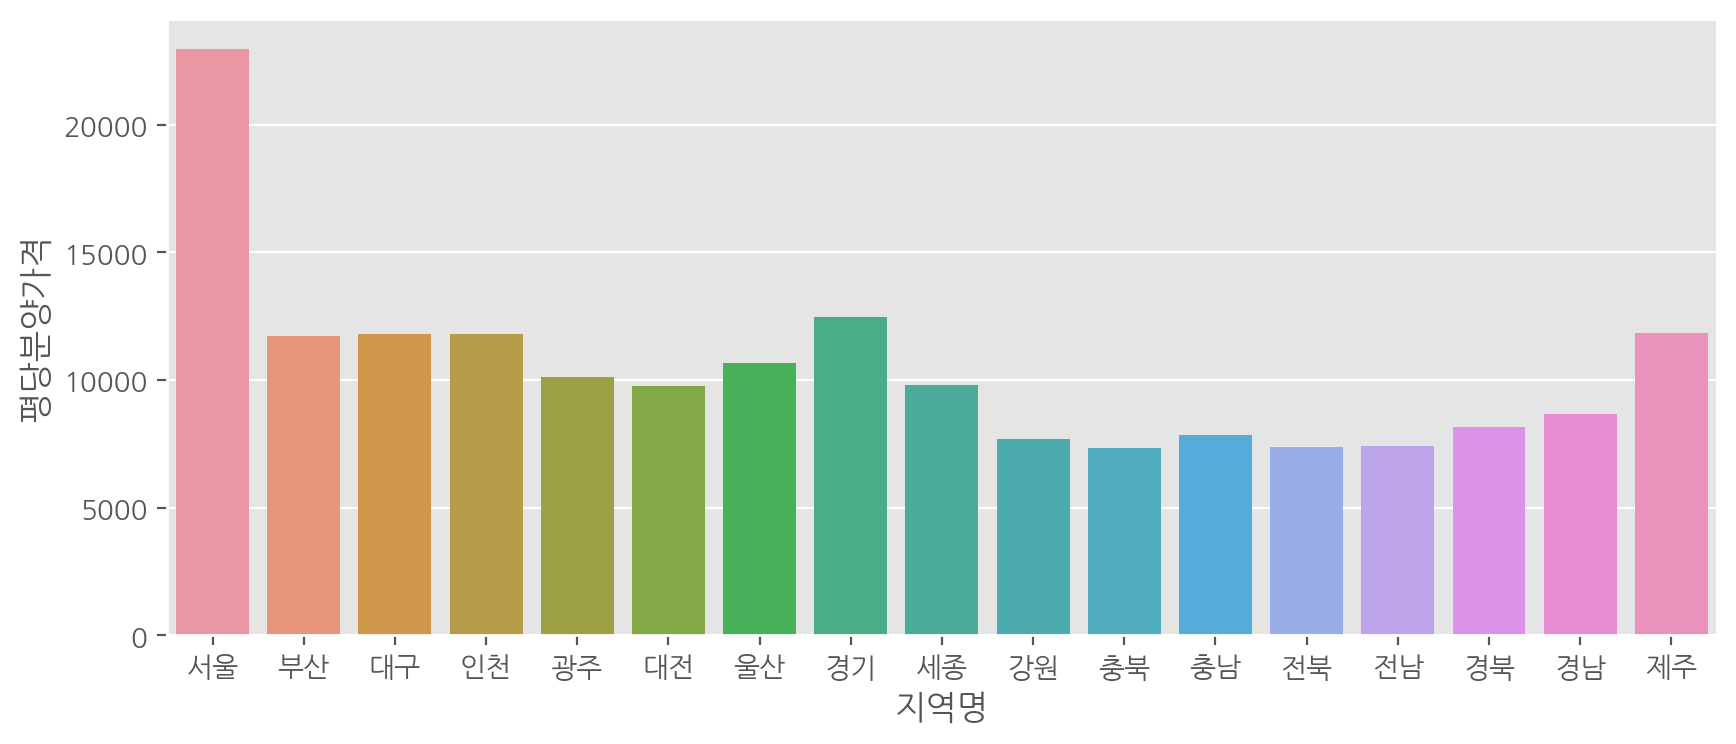

In [259]:
# barplot
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격", errorbar=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

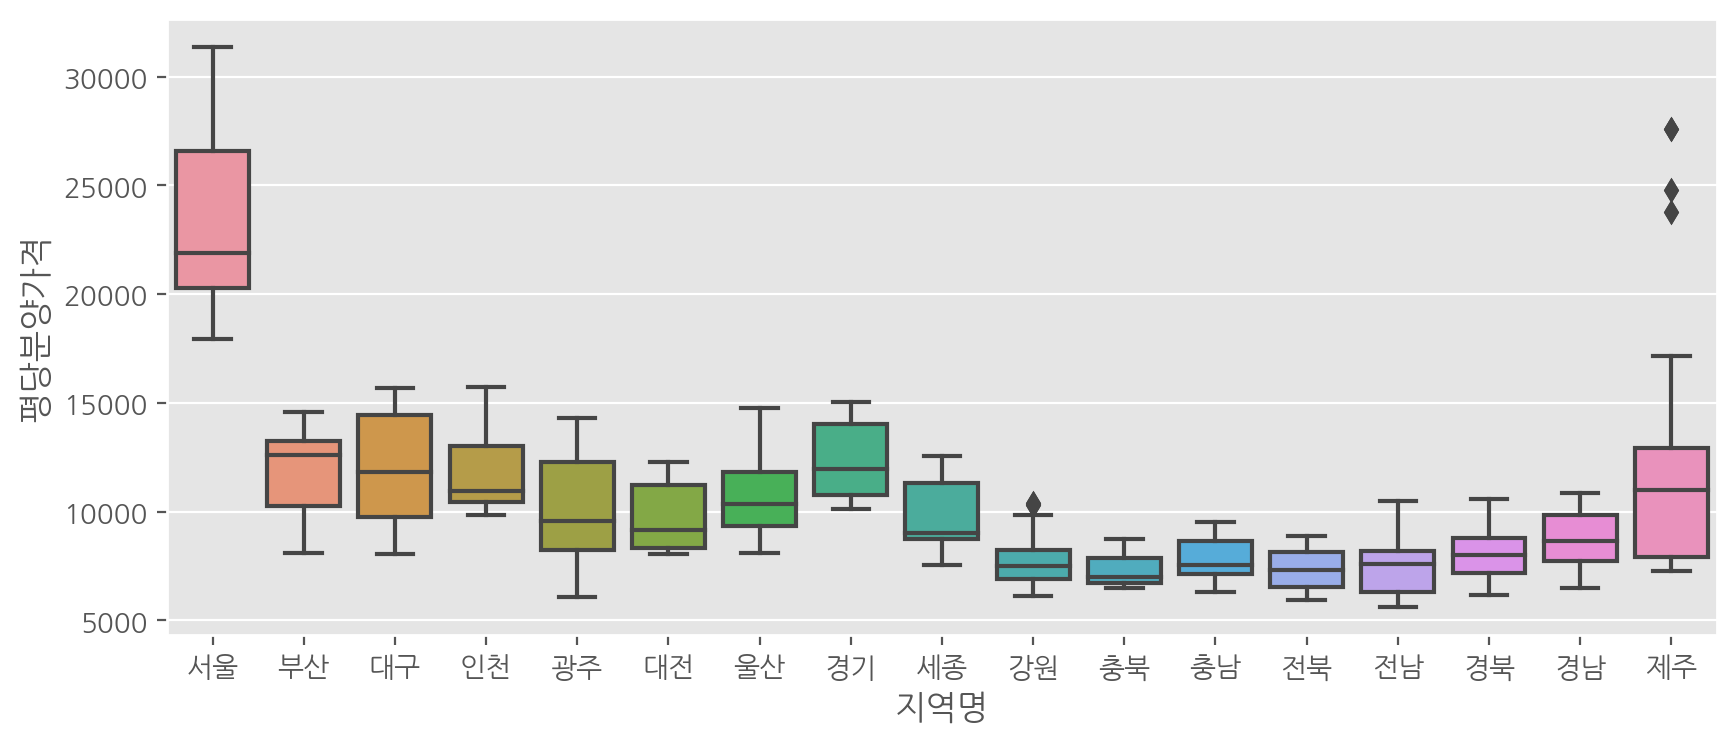

In [260]:
# boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

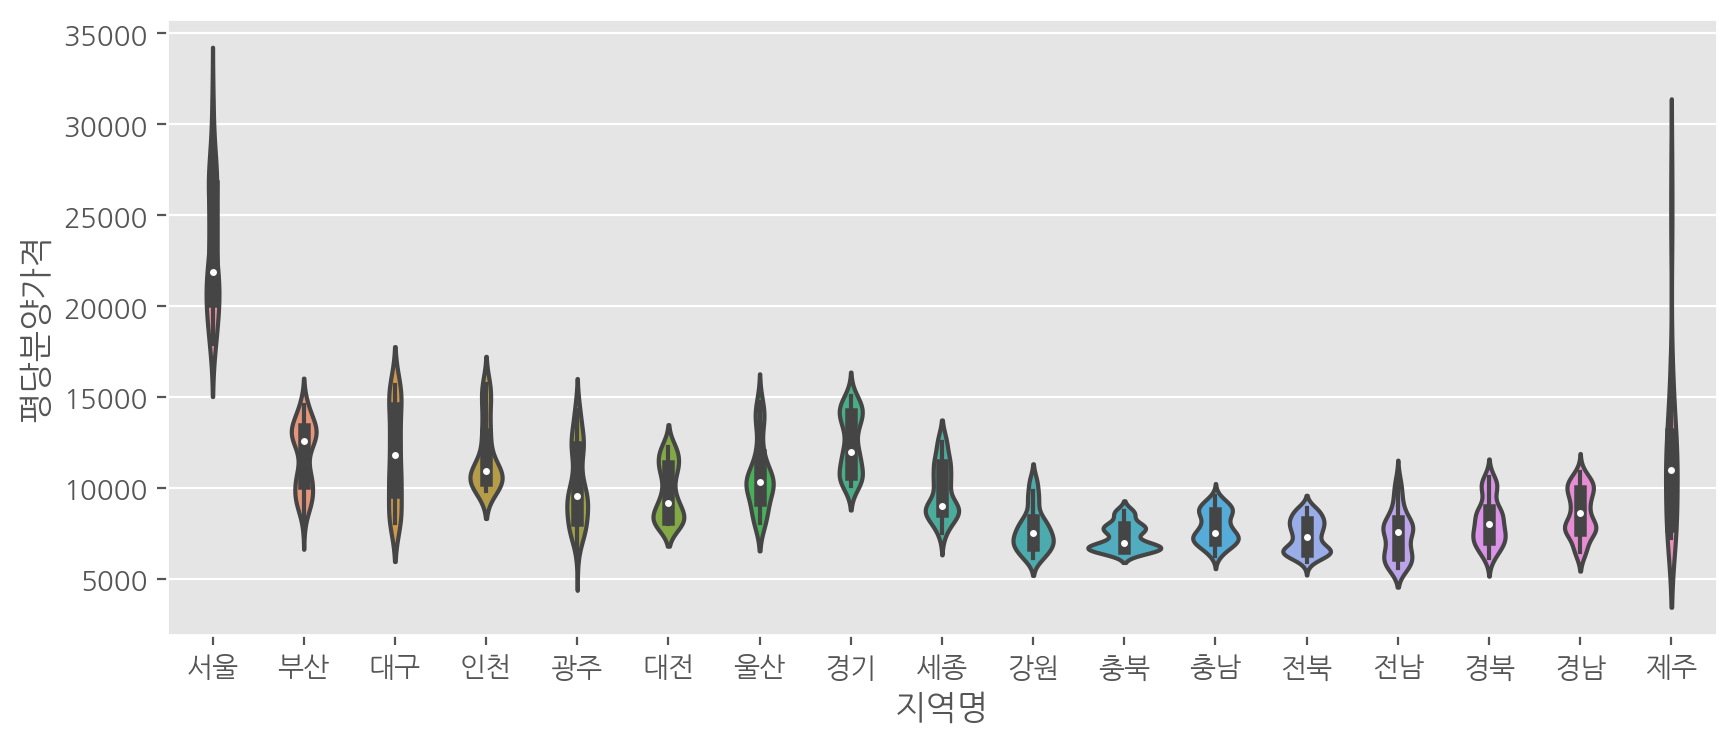

In [261]:
# violinplot
plt.figure(figsize=(10, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

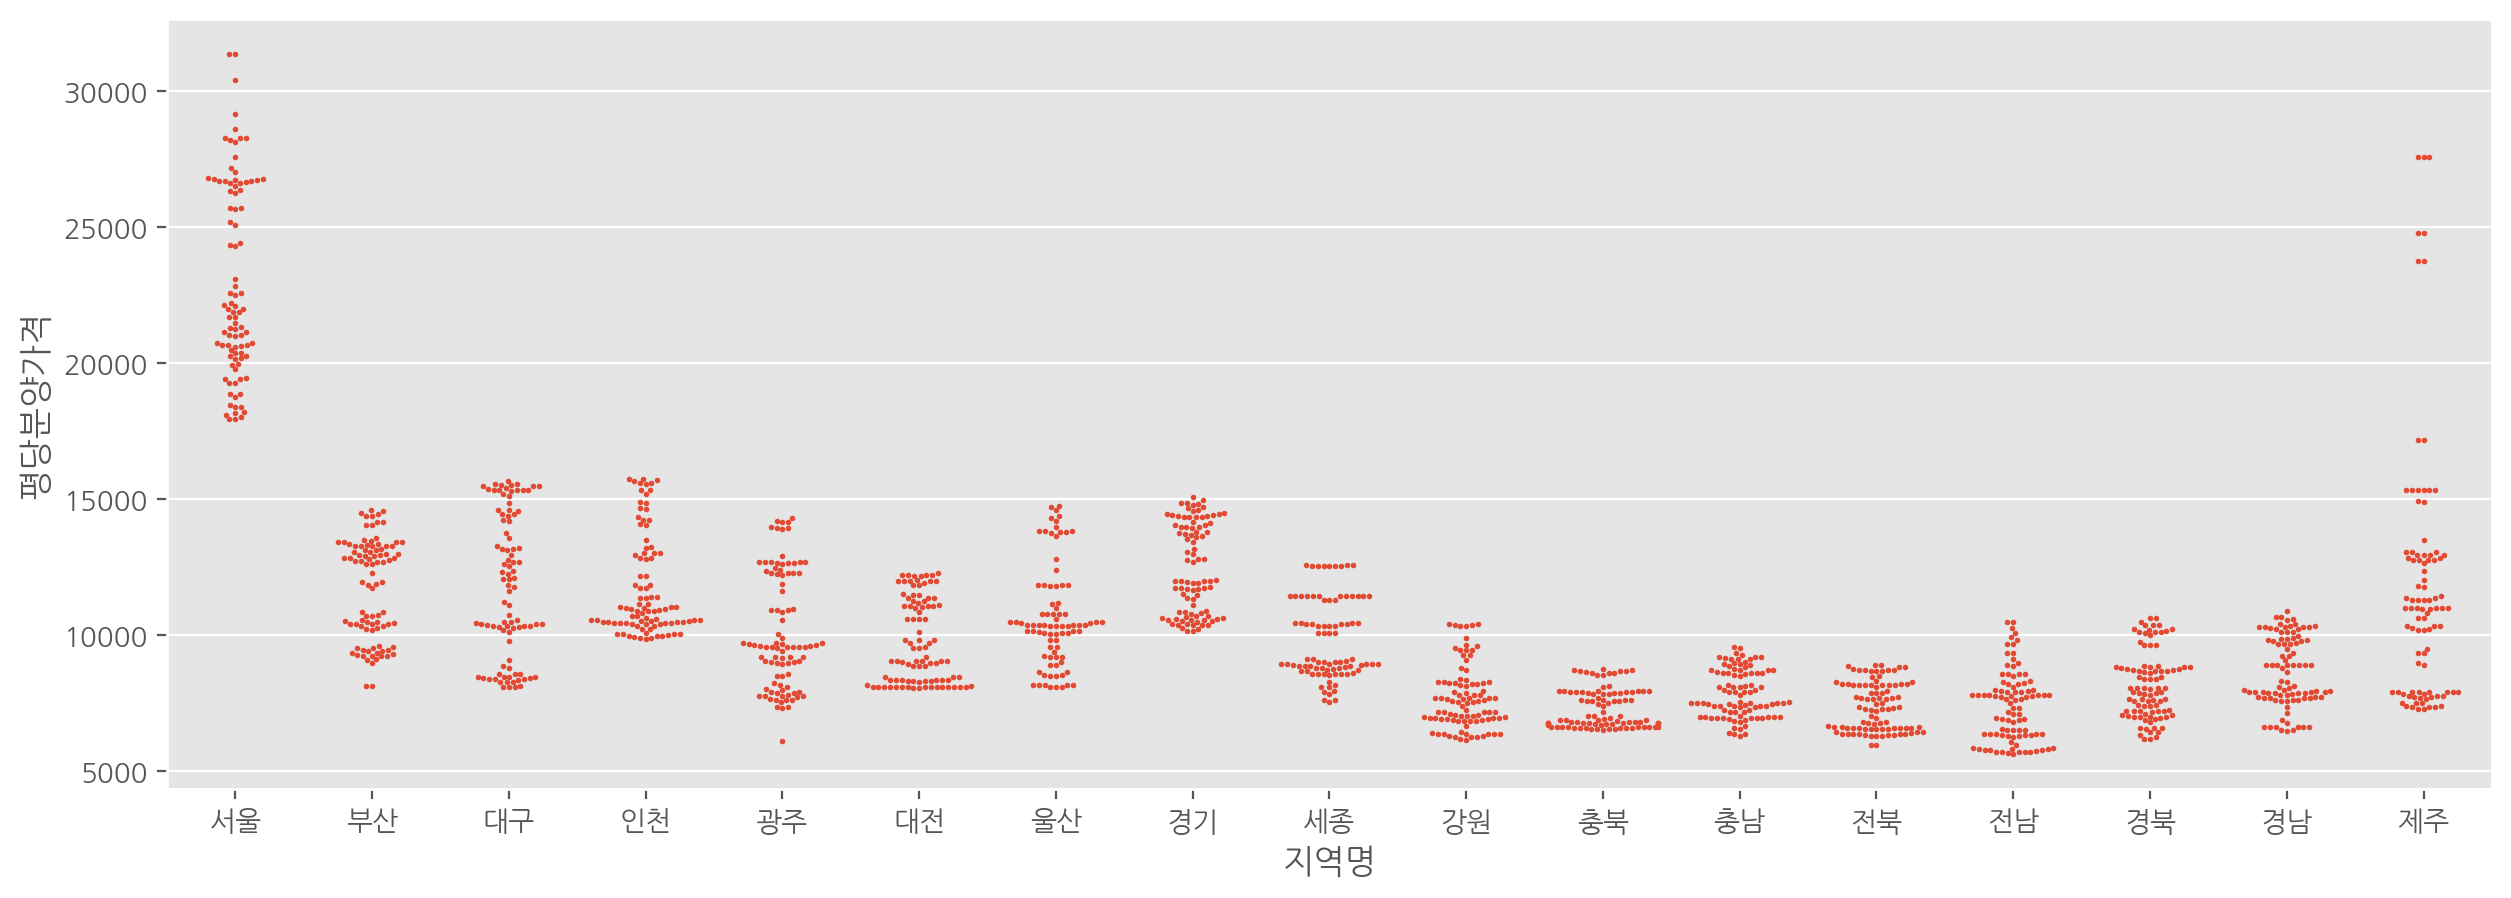

In [262]:
# swarmplot
plt.figure(figsize=(15, 5))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", size=2)

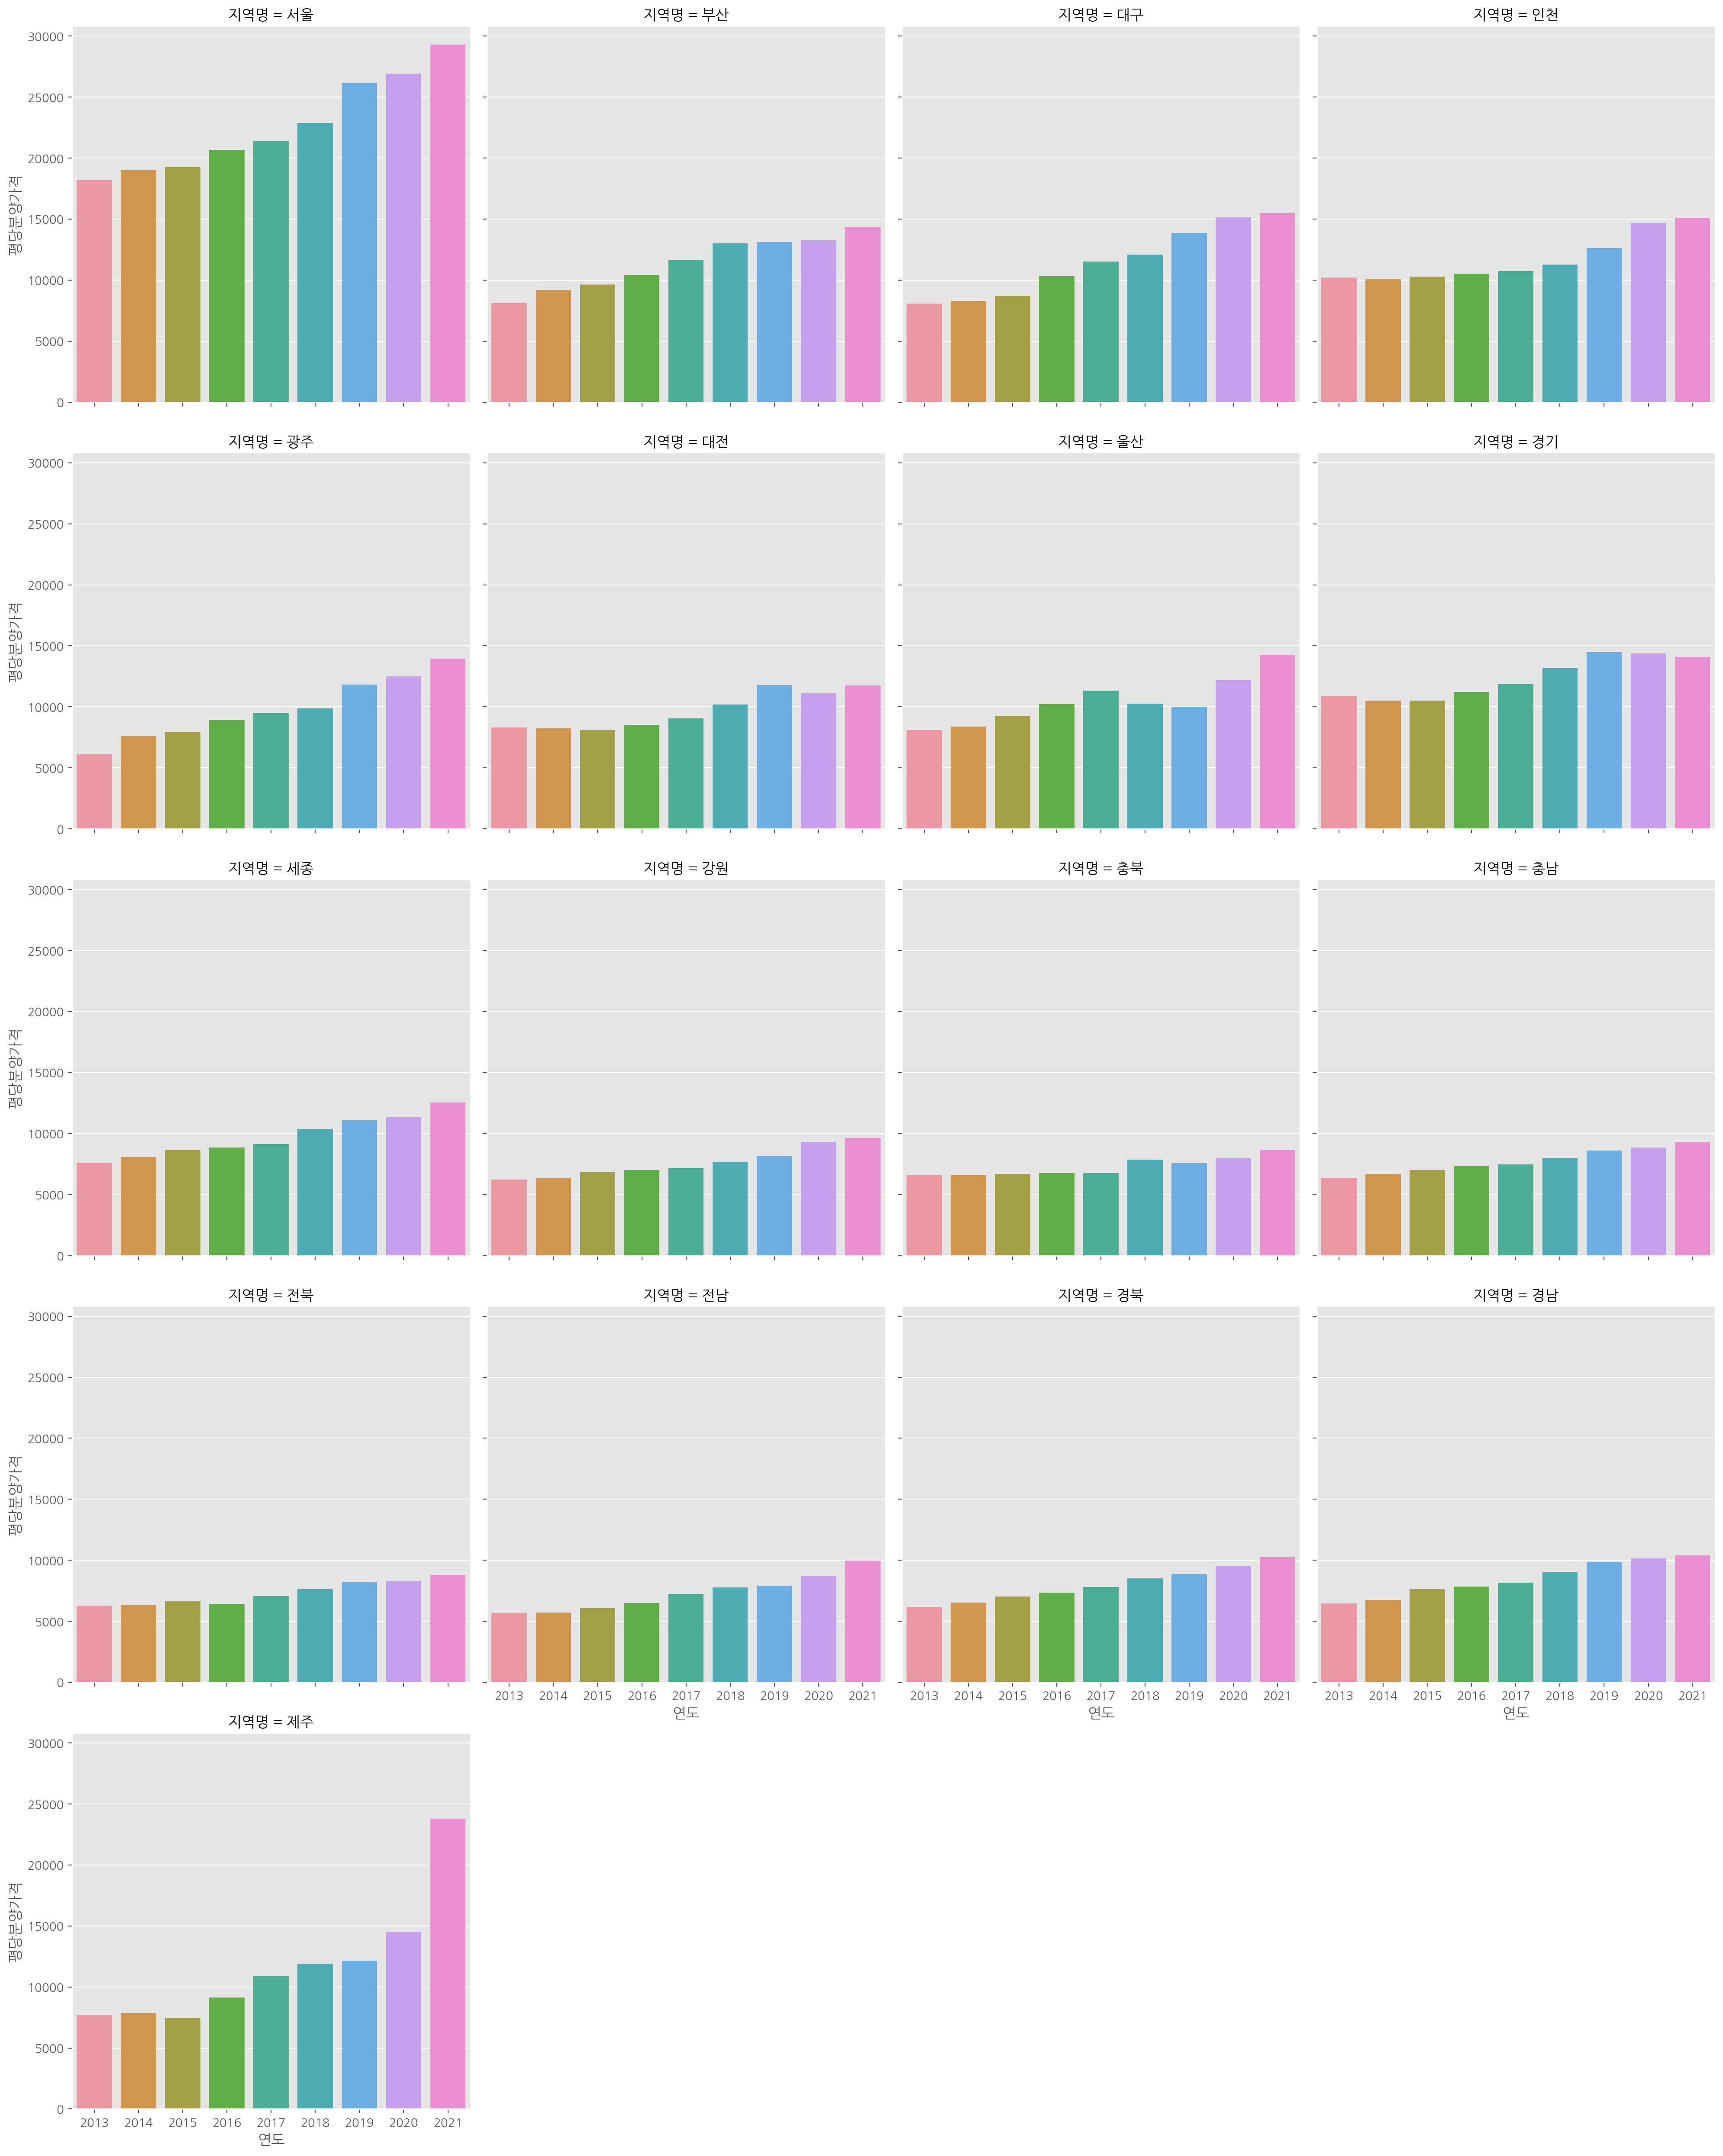

In [275]:
sns.catplot(data=df, x="연도", y="평당분양가격", col="지역명", col_wrap=4, kind='bar', errorbar=None)

## 정렬 시각화 두 가지 방법 

In [264]:
# df를 정렬하고 그리기
local_table = pd.pivot_table(data=df, index='지역명', values='평당분양가격').sort_values("평당분양가격", ascending=False)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

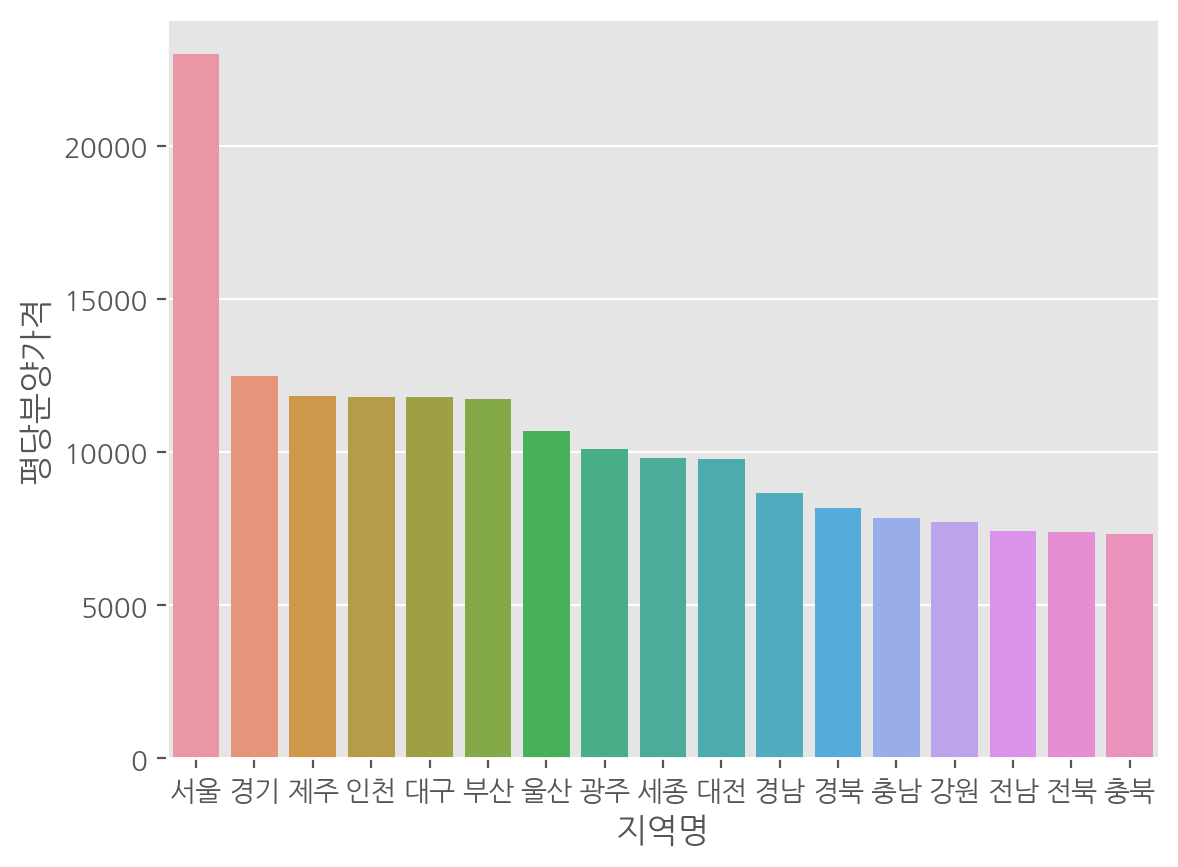

In [267]:
sns.barplot(data=local_table, x=local_table.index, y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

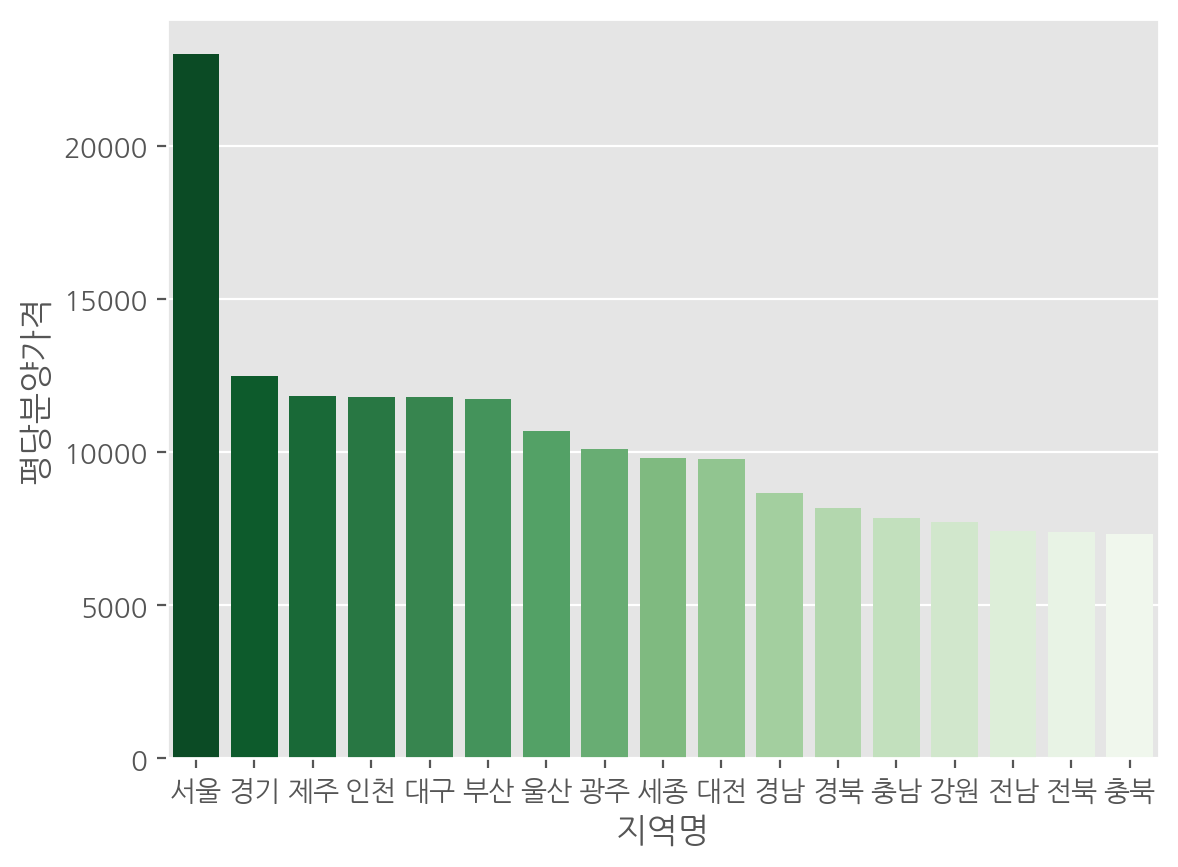

In [266]:
# 파리미터로 정렬
sns.barplot(data=df, x="지역명", y="평당분양가격", errorbar=None, order=local_table.index, palette="Greens_r")

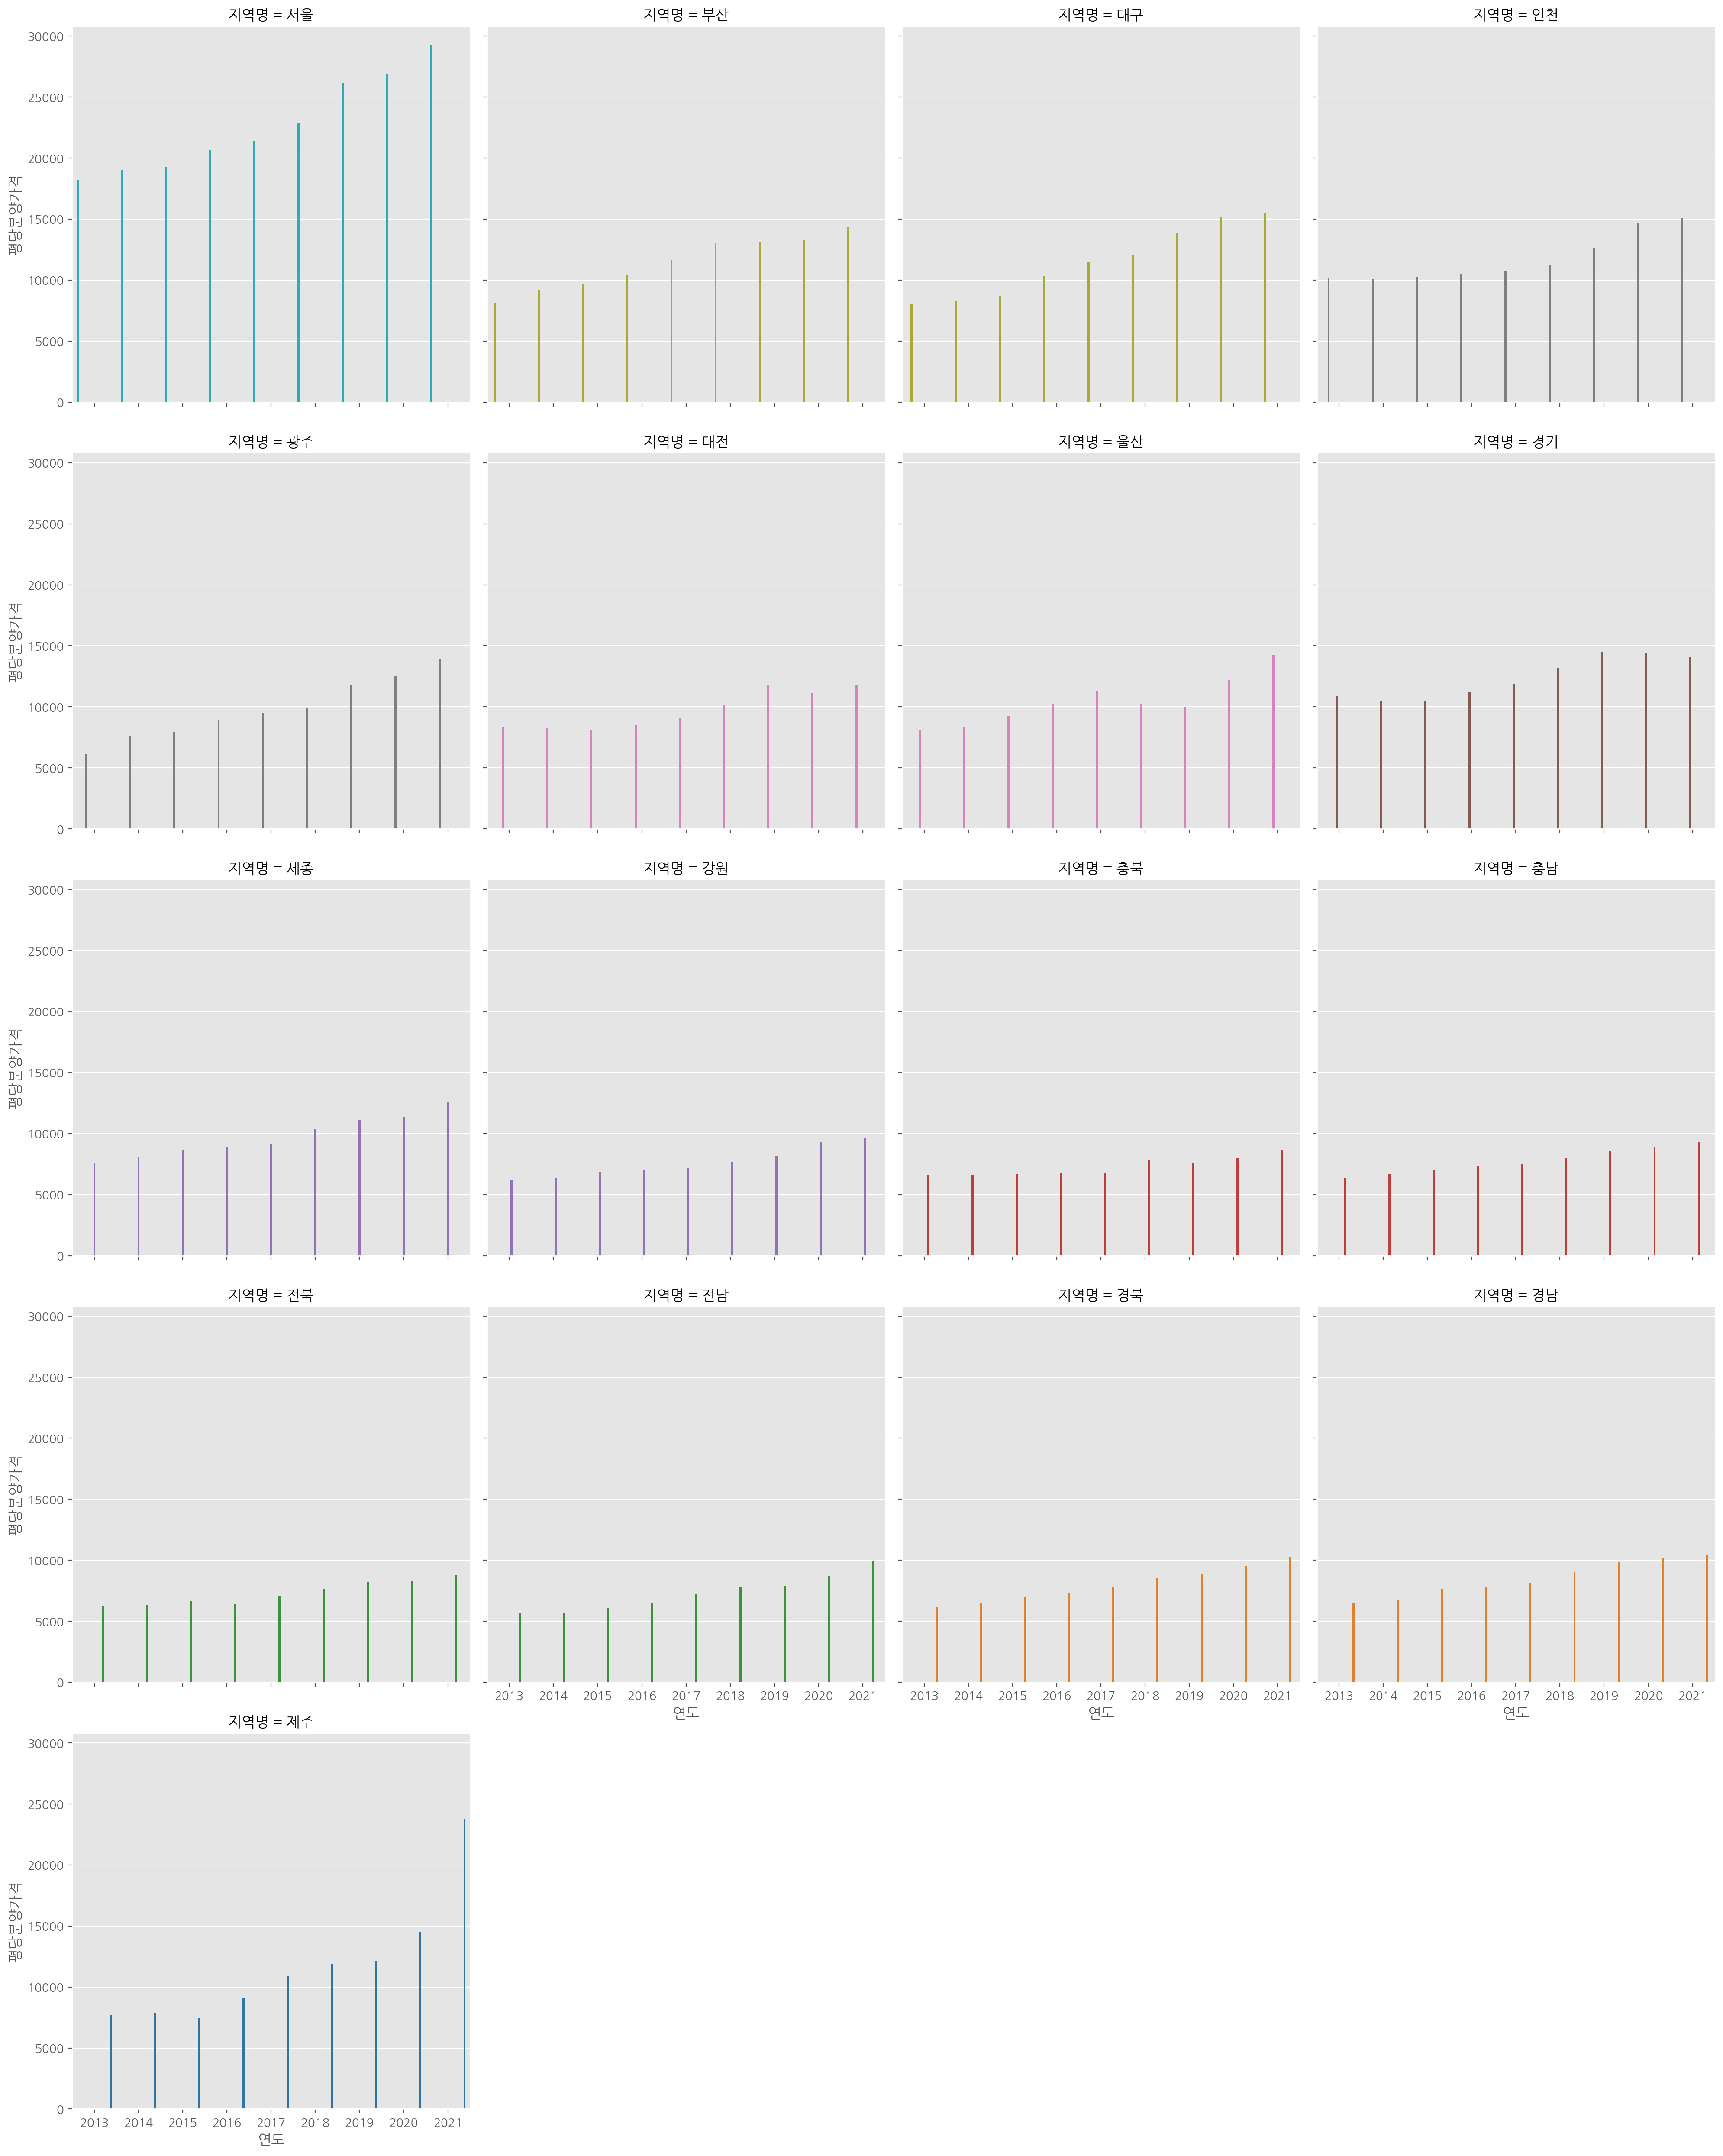

In [278]:
sns.catplot(data=df, x="연도", y="평당분양가격", col="지역명", col_wrap=4, kind="bar", hue="지역명", 
            errorbar=None, palette="tab10_r")